In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())


2.1.1
11.8
8700


In [3]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np


epi_img = nib.load(
    r"E:\HCP_25\102008\data.nii.gz"
)
print("加载医学图像类型为{}".format(type(epi_img)))
epi_img_data = epi_img.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_img_data)))
print("图像数据形状为{}".format(epi_img_data.shape))
print(epi_img_data[50,50,50,50])
print(np.max(epi_img_data))

加载医学图像类型为<class 'nibabel.nifti1.Nifti1Image'>
浮点图像数据类型为<class 'numpy.ndarray'>
图像数据形状为(145, 174, 145, 191)
912.0999145507812
32531.99609375


In [1]:
import nibabel as nib
import matplotlib.pyplot as plt


epi_index = nib.load(
    r"E:\HCP_25\101915/NODDI/FIT_OD.nii.gz"
)
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(10,5)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_index_data[120, :, :]
slice_1 = epi_index_data[:, 120, :]
slice_2 = epi_index_data[:, :, 77]
show_slices([slice_0, slice_1, slice_2])
print(epi_index_data[50, 50,70])

e:\anaconda3\envs\env_torch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\anaconda3\envs\env_torch\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
e:\anaconda3\envs\env_torch\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


FileNotFoundError: No such file or no access: 'E:/HCP_25/101915/NODDI/FIT_OD.nii.gz'

In [1]:
import os
import shutil

# 您提供的人员编号列表
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

# 指标名映射
feature_names = {
    0: "FIT_ICVF",
    1: "FIT_ISOVF",
    2: "FIT_OD"
}

# 指定目录
directory = r"/data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif"

# 遍历每个subject_id
for iMask, subject_id in enumerate(subject_ids):
    # 构造每个subject_id的路径
    subject_path = os.path.join(directory, subject_id)
    
    # 如果subject_id的文件夹不存在，则创建它
    if not os.path.exists(subject_path):
        os.makedirs(subject_path)
    
    # 在每个subject_id的文件夹中创建名为'NODDI'的子文件夹
    noddi_path = os.path.join(subject_path, 'NODDI')
    if not os.path.exists(noddi_path):
        os.mkdir(noddi_path)
    
    # 重命名并移动文件
    for feature_index in range(3):
        old_filename = "MESC_sep_dict_feature_{:02d}_sub_{:02d}.nii.gz".format(feature_index, iMask)
        old_filepath = os.path.join(directory, old_filename)
        new_filename = "{}.nii.gz".format(feature_names[feature_index])
        new_filepath = os.path.join(noddi_path, new_filename)
        
        if os.path.isfile(old_filepath):
            shutil.move(old_filepath, new_filepath)
            print(f"Moved and renamed {old_filepath} to {new_filepath}")
        else:
            print(f"File {old_filepath} does not exist, skipping...")

print("Files moved successfully into NODDI subfolders.")


Moved and renamed /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/MESC_sep_dict_feature_00_sub_00.nii.gz to /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/101107/NODDI/FIT_ICVF.nii.gz
Moved and renamed /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/MESC_sep_dict_feature_01_sub_00.nii.gz to /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/101107/NODDI/FIT_ISOVF.nii.gz
Moved and renamed /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/MESC_sep_dict_feature_02_sub_00.nii.gz to /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/101107/NODDI/FIT_OD.nii.gz
Moved and renamed /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/MESC_sep_dict_feature_00_sub_01.nii.gz to /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/101309/NODDI/FIT_ICVF.nii.gz
Moved and renamed /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/MESC_sep_dict_feature_01_sub_01.nii.gz to /data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif/101309/NODDI/FIT_ISOVF.ni

In [3]:
import nibabel as nib
import numpy as np
import os

def calculate_nrmse(predicted, ground_truth, mask):
    # 应用掩膜
    predicted_masked = predicted[mask == 1].flatten()
    ground_truth_masked = ground_truth[mask == 1].flatten()
    
    nrmse =  np.linalg.norm(predicted_masked-ground_truth_masked,2) / np.linalg.norm(ground_truth_masked,2)
    return nrmse

# 文件夹路径
subjects_dir = r"/data2/mayupeng/HCP_25_dataset_ori"
predict_dir = r"/data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif_new"

# 获取后20个文件夹名
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]
nrmse_results = []
nrmse_all = 0
for folder in subject_ids:
    # 加载掩膜
    mask_path = os.path.join(subjects_dir, folder, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata()

    # 加载预测值和真实值
    predicted_vic = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    predicted_viso = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    predicted_od = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    # 合并预测值为四维图像
    predicted_combined = np.stack((predicted_vic, predicted_viso, predicted_od), axis=-1)

    ground_truth_vic = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    ground_truth_viso= nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    ground_truth_od =nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    ground_truth = np.stack((ground_truth_vic, ground_truth_viso, ground_truth_od), axis=-1)

    # 计算NRMSE
    nrmse = calculate_nrmse(predicted_combined, ground_truth, mask)
    nrmse_all += nrmse
    nrmse_results.append((folder, nrmse))

# 输出结果
for subject, nrmse in nrmse_results:
    print(f"Subject {subject}: NRMSE = {nrmse}")
print(nrmse_all/20)

Subject 101107: NRMSE = 0.11824928571903501
Subject 101309: NRMSE = 0.13002554088039878
Subject 101410: NRMSE = 0.11653540858735179
Subject 101915: NRMSE = 0.11285934995891725
Subject 102008: NRMSE = 0.16177505353600352
Subject 102109: NRMSE = 0.12883074365578437
Subject 102311: NRMSE = 0.11677343369338952
Subject 102513: NRMSE = 0.11711917107343925
Subject 102614: NRMSE = 0.11639984174145043
Subject 102715: NRMSE = 0.12940594442363035
Subject 102816: NRMSE = 0.1158762788823287
Subject 103010: NRMSE = 0.12175807273749141
Subject 103111: NRMSE = 0.1207025060209348
Subject 103212: NRMSE = 0.1216836742623145
Subject 103414: NRMSE = 0.1187403248497992
Subject 103515: NRMSE = 0.11935258463660418
Subject 103818: NRMSE = 0.11291579166319102
Subject 104012: NRMSE = 0.11547756479043639
Subject 104416: NRMSE = 0.1180269368661655
Subject 104820: NRMSE = 0.11652814255171812
0.1214517825265192


In [4]:
import nibabel as nib
import numpy as np
import os

def calculate_psnr(predicted, ground_truth, mask):
    # 应用掩膜
    predicted_masked = predicted[mask == 1].flatten()
    ground_truth_masked = ground_truth[mask == 1].flatten()
    
    # 计算MSE
    mse = np.mean((predicted_masked - ground_truth_masked) ** 2)
    if mse == 0:
        return float('inf')
    
    # 假设MAX_I为1，因为NODDI指标一般归一化到[0,1]区间
    MAX_I = 1.0
    psnr = 20 * np.log10(MAX_I / np.sqrt(mse))
    return psnr

# 文件夹路径
subjects_dir = r"/data2/mayupeng/HCP_25_dataset_ori"
predict_dir = r"/data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif_new"

# 获取后20个文件夹名
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]
psnr_results = []
psnr_all = 0
for folder in subject_ids:
    # 加载掩膜
    mask_path = os.path.join(subjects_dir, folder, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata()

    # 加载预测值和真实值并合并为四维图像
    predicted_vic = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    predicted_viso = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    predicted_od = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()
    predicted_combined = np.stack((predicted_vic, predicted_viso, predicted_od), axis=-1)

    ground_truth_vic = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    ground_truth_viso= nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    ground_truth_od = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()
    ground_truth = np.stack((ground_truth_vic, ground_truth_viso, ground_truth_od), axis=-1)

    # 计算PSNR
    psnr = calculate_psnr(predicted_combined, ground_truth, mask)
    psnr_all +=psnr
    psnr_results.append((folder, psnr))

# 输出结果
for subject, psnr in psnr_results:
    print(f"Subject {subject}: PSNR = {psnr}")
print(psnr_all/20)

Subject 101107: PSNR = 24.659699211837935
Subject 101309: PSNR = 23.848155609253627
Subject 101410: PSNR = 24.74163881596272
Subject 101915: PSNR = 25.00484252887751
Subject 102008: PSNR = 21.6575761967365
Subject 102109: PSNR = 23.78430745090943
Subject 102311: PSNR = 24.509489990191547
Subject 102513: PSNR = 24.645318690238657
Subject 102614: PSNR = 24.534032390072802
Subject 102715: PSNR = 23.68507271170888
Subject 102816: PSNR = 24.833969895643634
Subject 103010: PSNR = 24.15608957279829
Subject 103111: PSNR = 24.285612339755165
Subject 103212: PSNR = 23.969437432378854
Subject 103414: PSNR = 24.608276181360523
Subject 103515: PSNR = 24.183154710066294
Subject 103818: PSNR = 25.18453938036275
Subject 104012: PSNR = 24.687208439746634
Subject 104416: PSNR = 24.48124974537202
Subject 104820: PSNR = 24.54074616507701
24.30002087291754


In [5]:
import nibabel as nib
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(predicted, ground_truth, mask):

    predicted_index = predicted[mask == 1]
    ground_truth_index = ground_truth[mask == 1]
    ssim_index = ssim(predicted_index, ground_truth_index, data_range=ground_truth_index.max() - ground_truth_index.min(),channel_axis=-1)

    # Return the average SSIM over the indices
    return ssim_index

# 文件夹路径
subjects_dir = r"/data2/mayupeng/HCP_25_dataset_ori"
predict_dir = r"/data2/mayupeng/my_code/test_linear_modi_v2_512_rankdif_new"

# 获取后20个文件夹名
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

ssim_results = []
ssim_all = 0
for folder in subject_ids:
    mask_path = os.path.join(subjects_dir, folder, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata()

    # 加载预测值和真实值并合并为四维图像
    predicted_vic = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    predicted_viso = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    predicted_od = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()
    predicted_combined = np.stack((predicted_vic, predicted_viso, predicted_od), axis=-1)

    ground_truth_vic = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    ground_truth_viso= nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    ground_truth_od = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()
    ground_truth = np.stack((ground_truth_vic, ground_truth_viso, ground_truth_od), axis=-1)

    # 计算SSIM
    current_ssim = calculate_ssim(predicted_combined, ground_truth, mask)
    ssim_all += current_ssim
    ssim_results.append((folder, current_ssim))

# 输出结果
for subject, current_ssim in ssim_results:
    print(f"Subject {subject}: SSIM = {current_ssim}")
print(ssim_all/20)

Subject 101107: SSIM = 0.8281800490363369
Subject 101309: SSIM = 0.8036538505103777
Subject 101410: SSIM = 0.8454244184079284
Subject 101915: SSIM = 0.8485415964348553
Subject 102008: SSIM = 0.8032499937624268
Subject 102109: SSIM = 0.8154854591950391
Subject 102311: SSIM = 0.8420642757740282
Subject 102513: SSIM = 0.8493296982225965
Subject 102614: SSIM = 0.8453562056826168
Subject 102715: SSIM = 0.8212351318610853
Subject 102816: SSIM = 0.8391667359781705
Subject 103010: SSIM = 0.8410552847908274
Subject 103111: SSIM = 0.8353783927665567
Subject 103212: SSIM = 0.8400480120522281
Subject 103414: SSIM = 0.8335828843637237
Subject 103515: SSIM = 0.8339338182794692
Subject 103818: SSIM = 0.8488382643491678
Subject 104012: SSIM = 0.8371854410479936
Subject 104416: SSIM = 0.8472689928778525
Subject 104820: SSIM = 0.83287581010977
0.8345927157751527


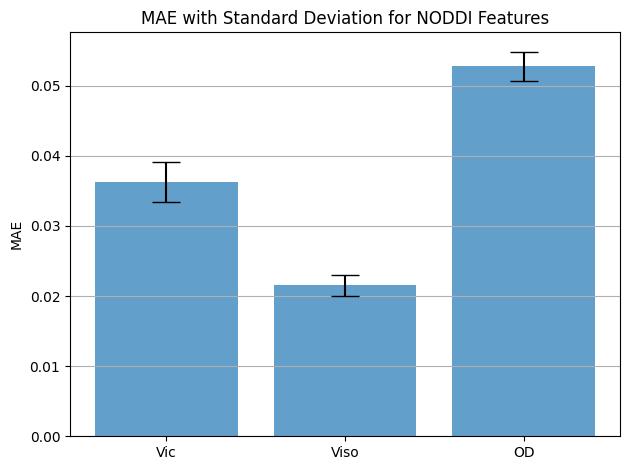

In [11]:
# It seems there was a misunderstanding in the previous plot. Let's correct it by calculating the means and standard deviations correctly.
# The previous plot only displayed the mean of the means, which is not correct.
# Now we will plot the MSE values for each feature as a bar chart with standard deviation error bars.

# Collecting all the MSE values for each feature
icvf_mse = [
    0.03464820981025696, 0.03892207890748978, 0.03453364968299866, 0.033671677112579346, 
    0.04567258432507515, 0.03836045041680336, 0.035204365849494934, 0.0345865860581398,
    0.035469137132167816, 0.040643513202667236, 0.0342332199215889, 0.035816583782434464,
    0.03738081082701683, 0.03715069964528084, 0.03459203615784645, 0.036007098853588104,
    0.032126255333423615, 0.0348920077085495, 0.03531307354569435, 0.03559437021613121
]
isovf_mse = [
    0.02114599384367466, 0.023543721064925194, 0.021428976207971573, 0.019861754029989243,
    0.022893914952874184, 0.023810209706425667, 0.02037842757999897, 0.020775673910975456,
    0.02148200012743473, 0.02511599473655224, 0.020944038406014442, 0.022228095680475235,
    0.022290119901299477, 0.02181064896285534, 0.0202031210064888, 0.020406438037753105,
    0.018383096903562546, 0.021229011937975883, 0.02131904475390911, 0.021429985761642456
]
od_mse = [
    0.05180452764034271, 0.055148426443338394, 0.05137016251683235, 0.050924841314554214,
    0.05874190106987953, 0.05570543557405472, 0.05324804037809372, 0.0509614460170269,
    0.0516023263335228, 0.05437355116009712, 0.05132633075118065, 0.05251980945467949,
    0.052831754088401794, 0.05394282564520836, 0.05262082815170288, 0.05331306904554367,
    0.04886315390467644, 0.053241241723299026, 0.05135924741625786, 0.052295491099357605
]

# Convert lists to numpy arrays for statistical calculations
icvf_mse = np.array(icvf_mse)
isovf_mse = np.array(isovf_mse)
od_mse = np.array(od_mse)

# Calculate the means and standard deviations
icvf_mean = np.mean(icvf_mse)
isovf_mean = np.mean(isovf_mse)
od_mean = np.mean(od_mse)
icvf_std = np.std(icvf_mse)
isovf_std = np.std(isovf_mse)
od_std = np.std(od_mse)

# Bar chart positions
x_pos = np.arange(3)

# Mean and standard deviation for each feature
means = [icvf_mean, isovf_mean, od_mean]
errors = [icvf_std, isovf_std, od_std]

# Create bar plots for each feature
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=errors, align='center', alpha=0.7, ecolor='black', capsize=10)

# Labeling
ax.set_ylabel('MAE')
ax.set_xticks(x_pos)
ax.set_xticklabels(['Vic', 'Viso', 'OD'])
ax.set_title('MAE with Standard Deviation for NODDI Features')

# Show grid lines and the plot
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


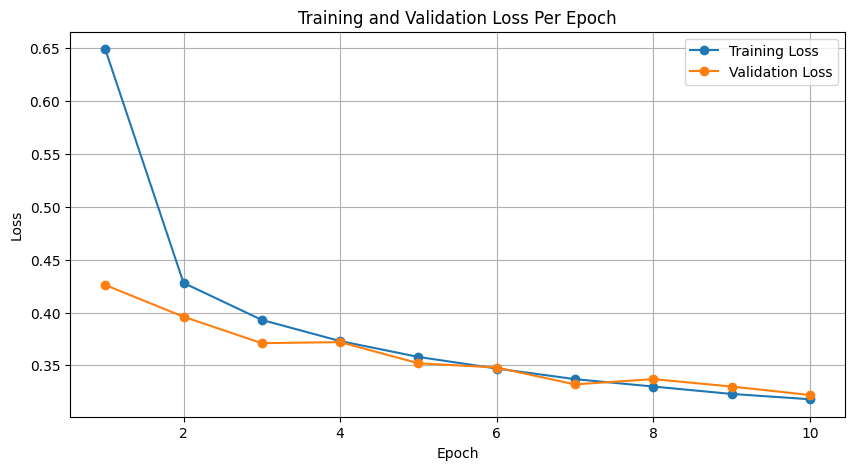

In [19]:
import matplotlib.pyplot as plt

# Extracted training and validation loss values from the provided image
training_loss = [
    0.649, 0.428, 0.393, 0.373, 0.358,
    0.347, 0.337, 0.33, 0.323, 0.318
]
validation_loss = [
    0.426, 0.396, 0.371, 0.372, 0.352,
    0.348, 0.332, 0.337, 0.33, 0.322
]

# Epochs
epochs = range(1, 11)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')

# Adding titles and labels
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


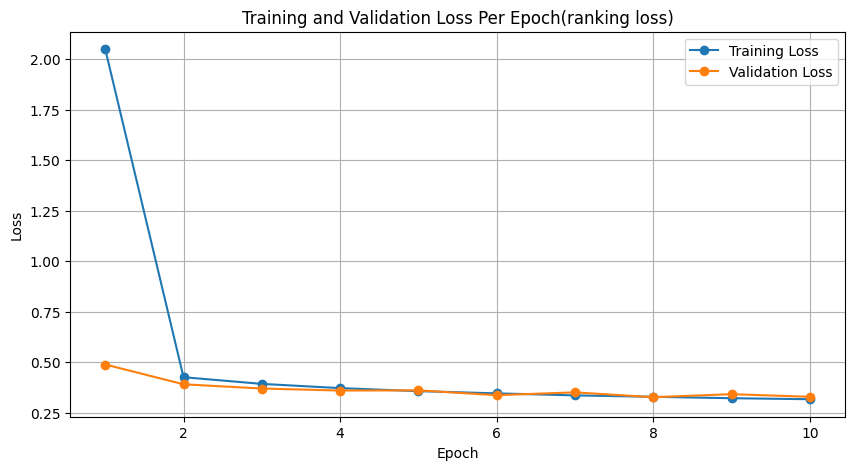

In [1]:
import matplotlib.pyplot as plt

# Extracted training and validation loss values from the provided image
training_loss = [2.05, 0.425, 0.392, 0.371, 0.356, 0.345, 0.335, 0.328, 0.321, 0.316]
validation_loss = [0.488, 0.39, 0.369, 0.359, 0.36, 0.336, 0.35, 0.326, 0.341, 0.328]

# Epochs
epochs = range(1, 11)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o')

# Adding titles and labels
plt.title('Training and Validation Loss Per Epoch(ranking loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [1]:
import os
import nibabel as nib
import numpy as np

# 指标名称和人员编号列表
features = ["ICVF_nrmse_new", "ISOVF_nrmse_new", "OD_nrmse_new"]
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

# 根目录
mask_root = "/data2/mayupeng/HCP_25_dataset_ori"
pred_root = "/data2/mayupeng/predict"

# 存储平均值的列表
average_values = []

# 遍历每个subject_id和指标
for subject_id in subject_ids:
    # 加载mask
    mask_path = os.path.join(mask_root, subject_id, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata(dtype=np.float32)

    for feature in features:
        # 构造差值文件的路径
        diff_path = os.path.join(pred_root, subject_id, "NODDI", f"{feature}.nii.gz")
        
        # 加载差值图像
        diff_img = nib.load(diff_path).get_fdata(dtype=np.float32)
        
        # 在mask为1的区域计算平均值
        average = np.mean(diff_img[mask == 1])
        average_values.append({'subject_id': subject_id, 'feature': feature, 'average': average})

# 打印结果
for item in average_values:
    print(f"Subject {item['subject_id']} Feature {item['feature']} Average: {item['average']}")


/data2/mayupeng/conda/envs/env_torch/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Subject 101107 Feature ICVF_nrmse_new Average: inf
Subject 101107 Feature ISOVF_nrmse_new Average: inf
Subject 101107 Feature OD_nrmse_new Average: 0.16962561011314392
Subject 101309 Feature ICVF_nrmse_new Average: inf
Subject 101309 Feature ISOVF_nrmse_new Average: inf
Subject 101309 Feature OD_nrmse_new Average: 0.17639602720737457
Subject 101410 Feature ICVF_nrmse_new Average: inf
Subject 101410 Feature ISOVF_nrmse_new Average: inf
Subject 101410 Feature OD_nrmse_new Average: 0.1582789272069931
Subject 101915 Feature ICVF_nrmse_new Average: inf
Subject 101915 Feature ISOVF_nrmse_new Average: inf
Subject 101915 Feature OD_nrmse_new Average: 0.16218958795070648
Subject 102008 Feature ICVF_nrmse_new Average: inf
Subject 102008 Feature ISOVF_nrmse_new Average: inf
Subject 102008 Feature OD_nrmse_new Average: 0.1611044704914093
Subject 102109 Feature ICVF_nrmse_new Average: inf
Subject 102109 Feature ISOVF_nrmse_new Average: inf
Subject 102109 Feature OD_nrmse_new Average: 0.176238059997

加载医学图像类型为<class 'nibabel.nifti1.Nifti1Image'>
浮点图像数据类型为<class 'numpy.ndarray'>
图像数据形状为(145, 174, 145)
0.17659145593643188


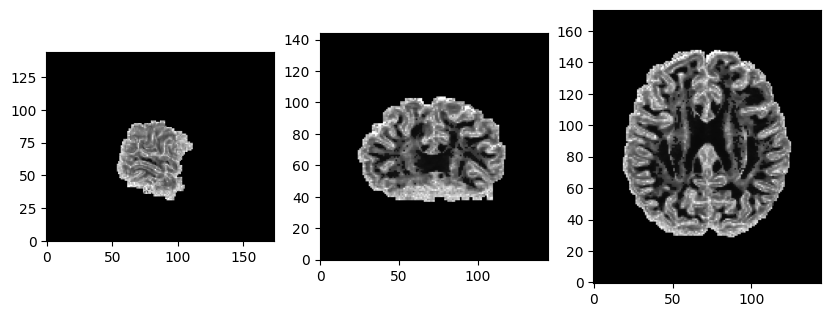

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt


epi_index = nib.load(
    r'/data2/mayupeng/HCP_25_dataset/101107/NODDI/FIT_OD.nii.gz'
)
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(10,5)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_index_data[120, :, :]
slice_1 = epi_index_data[:, 120, :]
slice_2 = epi_index_data[:, :, 77]
show_slices([slice_0, slice_1, slice_2])
print(epi_index_data[50, 50,70])

In [18]:

import nibabel as nib
import matplotlib.pyplot as plt


epi_index = nib.load(
    r'/data2/mayupeng/demo_tensor_sh/fa_noise.nii.gz'
)
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(10,5)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")


加载医学图像类型为<class 'nibabel.nifti1.Nifti1Image'>
浮点图像数据类型为<class 'numpy.ndarray'>
图像数据形状为(9, 9, 1)


In [50]:
def count_numbers_around_targets(file_path, targets, tolerance):
    counts = {target: 0 for target in targets}

    with open(file_path, 'r') as file:
        for line in file:
            for word in line.split():
                try:
                    number = float(word)
                    for target in targets:
                        if abs(number - target) <= tolerance:
                            counts[target] += 1
                except ValueError:
                    # 忽略无法转换为数字的文本
                    continue

    return counts

# 使用示例
file_path = r'C:\Users\MYP\Desktop/new.txt'  # 替换为你的文件路径
targets = [0, 1000, 2000, 3000]
tolerance = 50  # 你可以根据需要调整这个容差值

counts = count_numbers_around_targets(file_path, targets, tolerance)
print(counts)


{0: 18, 1000: 90, 2000: 90, 3000: 90}


In [2]:
import os
import shutil

def extract_files(subject_list_file, source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    with open(subject_list_file, 'r') as file:
        subjects = file.read().splitlines()

    for subject in subjects:
        for filename in ['dti.bval', 'dti.bvec']:
            source_path = os.path.join(source_dir, subject, filename)
            if os.path.exists(source_path):
                shutil.copy(source_path, os.path.join(target_dir, f"{subject}_{filename}"))
            else:
                print(f"File {filename} not found in {subject} folder")

# 使用示例
subject_list_file = '/data2/mayupeng/HCP_25_dataset/subjectlist.txt'
source_dir = '/data2/mayupeng/HCP_25_dataset'
target_dir = '/data2/mayupeng/HCP_25_dataset_extracted'  # 新文件夹路径

extract_files(subject_list_file, source_dir, target_dir)


In [4]:
import os
import shutil

# 定义源路径和目标路径
src_base_path = r"/data2/mayupeng/HCP_25_dataset_extracted"
dst_base_path = r"/data2/mayupeng/HCP_25_dataset"

# 读取 subject.txt 文件中的子文件夹名称
with open('/data2/mayupeng/HCP_25_dataset/subjectlist.txt', 'r') as file:
    subjects = file.read().splitlines()

# 遍历每个子文件夹，移动文件
for subject in subjects:
    src_subject_path = os.path.join(src_base_path, subject)
    dst_subject_path = os.path.join(dst_base_path, subject)

    # 确保目标文件夹存在
    os.makedirs(dst_subject_path, exist_ok=True)

    # 移动 b1500_30.txt 和 b3000_30.txt 文件
    for filename in ["b1000_30.txt", "b2000_30.txt"]:
        src_file_path = os.path.join(src_subject_path, filename)
        dst_file_path = os.path.join(dst_subject_path, filename)
        print(dst_file_path)

        if os.path.exists(src_file_path):
            shutil.move(src_file_path, dst_file_path)


/data2/mayupeng/HCP_25_dataset/100206/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/100206/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/100307/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/100307/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/100408/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/100408/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/100610/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/100610/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/101006/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/101006/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/101107/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/101107/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/101309/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/101309/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/101410/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/101410/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/101915/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/101915/b2000_30.txt
/data2/mayupeng/HCP_25_dataset/102008/b1000_30.txt
/data2/mayupeng/HCP_25_dataset/

In [1]:
import SimpleITK as sitk
origin_img=sitk.ReadImage('/data2/mayupeng/HCP_25_dataset_ori/100206/NODDI/FIT_ICVF.nii.gz') #读取原始文件

origin=origin_img.GetOrigin() #这三句是获取的原始图像文件的位置和方向吧。
spacing=origin_img.GetSpacing()
direction=origin_img.GetDirection()
w=sitk.ReadImage("/data2/mayupeng/predict/101107/NODDI/FIT_ICVF.nii.gz")  #  读取自己预测得到的nii.gz文件

w.SetOrigin(origin) #将自己的文件处理成和官方一致的位置坐标系
w.SetSpacing(spacing)
w.SetDirection(direction)
sitk.WriteImage(w, "/data2/mayupeng/predict/101107/NODDI/FIT_ICVF_new.nii.gz") #处理完之后保存到相应的合适位置。







RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "/data2/mayupeng/FIT_ISOVF.nii.gz" does not exist.

In [1]:
import SimpleITK as sitk
import os

# 指标名称和人员编号列表
features = ["FIT_ICVF", "FIT_ISOVF", "FIT_OD"]
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

# 根目录
gt_root = "/data2/mayupeng/HCP_25_dataset_ori"
pred_root = "/data2/mayupeng/predict"

# 遍历每个subject_id和指标
for subject_id in subject_ids:
    for feature in features:
        # 构造原始文件和预测文件的路径
        origin_path = os.path.join(gt_root, subject_id, "NODDI", f"{feature}.nii.gz")
        pred_path = os.path.join(pred_root, subject_id, "NODDI", f"{feature}.nii.gz")
        
        # 读取原始图像和预测图像
        origin_img = sitk.ReadImage(origin_path)
        pred_img = sitk.ReadImage(pred_path)

        # 将预测图像校准到与原始图像一致的空间属性
        pred_img.SetOrigin(origin_img.GetOrigin())
        pred_img.SetSpacing(origin_img.GetSpacing())
        pred_img.SetDirection(origin_img.GetDirection())

        # 保存校准后的预测图像
        new_pred_path = os.path.join(pred_root, subject_id, "NODDI", f"{feature}_new.nii.gz")
        sitk.WriteImage(pred_img, new_pred_path)
        print(f"Processed and saved: {new_pred_path}")


Processed and saved: /data2/mayupeng/predict/101107/NODDI/FIT_ICVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101107/NODDI/FIT_ISOVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101107/NODDI/FIT_OD_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101309/NODDI/FIT_ICVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101309/NODDI/FIT_ISOVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101309/NODDI/FIT_OD_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101410/NODDI/FIT_ICVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101410/NODDI/FIT_ISOVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101410/NODDI/FIT_OD_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101915/NODDI/FIT_ICVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101915/NODDI/FIT_ISOVF_new.nii.gz
Processed and saved: /data2/mayupeng/predict/101915/NODDI/FIT_OD_new.nii.gz
Processed and saved: /data2/mayupeng/predict/102008/NODDI/FIT_ICVF_n

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt


epi_index = nib.load(
    r'/data2/mayupeng/fa_nrmse.nii.gz'
)
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(10,5)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epi_index_data[120, :, :]
slice_1 = epi_index_data[:, 120, :]
slice_2 = epi_index_data[:, :, 77]
show_slices([slice_0, slice_1, slice_2])
print(epi_index_data[50, 50,70])

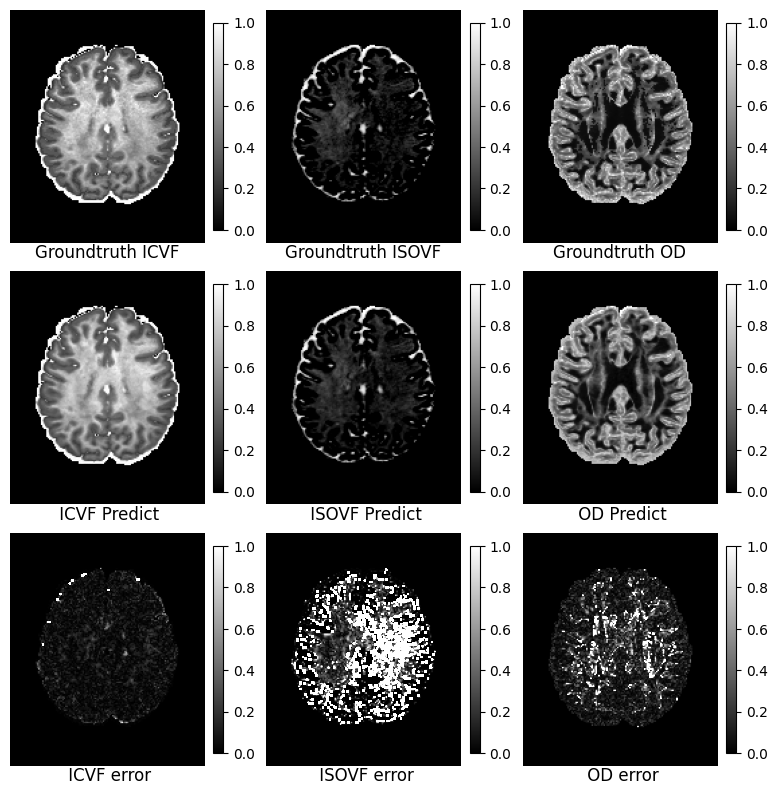

In [22]:
# Revised code snippet to include titles for each plot when displaying the NIfTI slices.

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Function to load a NIfTI file and extract the specified slice number
def load_nifti_slice(file_path, slice_number):
    # Load the NIfTI file
    nifti_data = nib.load(file_path)
    # Get the data array from the NIfTI file
    data_array = nifti_data.get_fdata()
    # Extract the specified slice
    slice_data = data_array[:, :, slice_number]
    return slice_data

# Paths to the ground truth and predicted files for dmritool sampling
groundtruth_files = {
    'ICVF': '/data2/mayupeng/FIT_ICVF.nii.gz',
    'ISOVF': '/data2/mayupeng/FIT_ISOVF.nii.gz',
    'OD': '/data2/mayupeng/FIT_OD.nii.gz'
}

dmritool_sampling_files = {
    'ICVF Predict': '/data2/mayupeng/predict/101107/NODDI/FIT_ICVF_new.nii.gz',
    'ISOVF Predict': '/data2/mayupeng/predict/101107/NODDI/FIT_ISOVF_new.nii.gz',
    'OD Predict': '/data2/mayupeng/predict/101107/NODDI/FIT_OD_new.nii.gz',
    'ICVF error': '/data2/mayupeng/predict/101107/NODDI/ICVF_nrmse_new.nii.gz',
    'ISOVF error': '/data2/mayupeng/predict/101107/NODDI/ISOVF_nrmse_new.nii.gz',
    'OD error': '/data2/mayupeng/predict/101107/NODDI/OD_nrmse_new.nii.gz'
}

# The slice number to extract
slice_number = 77

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed


# Function to plot the slices with titles
def plot_slices(files_dict, row, axes, title_prefix=''):
    for col, (title, file_path) in enumerate(files_dict.items()):
        slice_data = load_nifti_slice(file_path, slice_number)
        ax = axes[row, col]
        # 设置图像显示范围为0-1
        im = ax.imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=1)
        ax.set_title(f"{title_prefix} {title}", y=-0.1)
        ax.axis('off')
        # 为每个子图添加颜色条
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # 调整颜色条的大小和位置

# Plot groundtruth slices in the first row
plot_slices(groundtruth_files, 0, axes, title_prefix='Groundtruth')

# Plot dmritool sampling prediction slices in the second row and NRMSE in the third row
plot_slices({k: dmritool_sampling_files[k] for k in dmritool_sampling_files if 'Predict' in k}, 1, axes)
plot_slices({k: dmritool_sampling_files[k] for k in dmritool_sampling_files if 'error' in k}, 2, axes)

plt.tight_layout()
plt.show()

# Reminder: This code needs to be executed in a local environment where the nibabel library is installed
# and the .nii.gz files are accessible. It will not run in this online environment.


In [1]:
import nibabel as nib
import numpy as np

epi_index = nib.load(r"/data2/mayupeng/HCP_25_dataset_new/100206/data_combined.nii.gz")
print("加载医学图像类型为{}".format(type(epi_index)))
epi_index_data = epi_index.get_fdata()
print("浮点图像数据类型为{}".format(type(epi_index_data)))
print("图像数据形状为{}".format(epi_index_data.shape))



ModuleNotFoundError: No module named 'numpy'

In [4]:
import os

# 设置基础目录和主题列表文件的路径
base_dir = "/data2/mayupeng/HCP_25_dataset_ori"
subject_list_file = os.path.join(base_dir, "subjectlist.txt")

# 要删除的文件列表
files_to_remove = ["data_combined.nii.gz"]

# 读取主题列表并遍历每个主题
with open(subject_list_file, 'r') as file:
    for subject in file:
        subject = subject.strip()  # 移除行尾的换行符
        subject_dir = os.path.join(base_dir, subject)

        # 对每个文件进行检查和删除
        for file_name in files_to_remove:
            file_path = os.path.join(subject_dir, file_name)
            if os.path.exists(file_path):
                os.remove(file_path)
                print(f"已删除文件：{file_path}")
            else:
                print(f"文件不存在，跳过：{file_path}")

print("删除操作完成。")


已删除文件：/data2/mayupeng/HCP_25_dataset_ori/100206/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/100307/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/100408/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/100610/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/101006/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/101107/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/101309/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/101410/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/101915/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/102008/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/102109/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/102311/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/102513/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_dataset_ori/102614/data_combined.nii.gz
已删除文件：/data2/mayupeng/HCP_25_datas

In [3]:
import numpy as np
import nibabel as nib
import os


def angle_between_vectors(vec1, vec2):
    """计算两个向量之间的夹角（以弧度为单位）。"""
    cosine_angle = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    angle = np.arccos(np.clip(cosine_angle, -1, 1))
    return angle

def cosine_distance(vec1, vec2):
    """计算两个向量的余弦距离，距离定义为两向量夹角的余弦值。
       如果夹角大于90度，则将其中一个向量取反方向。"""
    angle = angle_between_vectors(vec1, vec2)
    if angle > np.pi / 2:
        # 如果夹角大于90度，取其中一个向量的反方向
        angle = angle_between_vectors(-vec1, vec2)
    return 1 - np.cos(angle)

def find_closest_vectors(target_vectors, candidate_vectors, candidate_indices):
    """寻找与目标向量夹角最小的向量。"""
    closest_indices = []
    for target in target_vectors:
        distances = [cosine_distance(target, candidate_vectors[i]) for i in candidate_indices]
        sorted_indices = np.argsort(distances)
        closest_indices.append(candidate_indices[sorted_indices[0]])
    return list(closest_indices)


def process_subject_data(subject_folder, bval_target, selected_bvecs_path, num_vectors):
    data_path = os.path.join(subject_folder, "data_normalize_dwi.nii.gz")
    bval_path = os.path.join(subject_folder, "data_normalize_b.txt")
    bvec_path = os.path.join(subject_folder, "data_normalize_grad.txt")

    data_img = nib.load(data_path)
    data = data_img.get_fdata()
    bvals = np.loadtxt(bval_path)
    bvecs = np.loadtxt(bvec_path)

    target_indices = np.where(bvals == bval_target)[0]

    target_bvecs = bvecs[target_indices]
    
    selected_bvecs = np.loadtxt(selected_bvecs_path)

    closest_indices = find_closest_vectors(selected_bvecs, bvecs, target_indices)
    combined_data = data[..., closest_indices]
    
    return combined_data, data_img


subject_list_path = "/data2/mayupeng/HCP_25_dataset_ori/subjectlist.txt"
with open(subject_list_path, "r") as file:
    subjects = file.read().splitlines()

subject = '101107'
subject_folder = os.path.join("/data2/mayupeng/HCP_25_dataset_ori", subject)
combined_images = []
reference_img = None
combined_1000, img_1000 = process_subject_data(
    subject_folder, 1000, "/data2/mayupeng/HCP_25_dataset_ori/100206/b1000_30.txt", 30
)
combined_2000, img_2000 = process_subject_data(
    subject_folder, 2000, "/data2/mayupeng/HCP_25_dataset_ori/100206/b2000_30.txt", 30
)
if combined_1000.shape[3] == 1:
    combined_1000 = np.squeeze(combined_1000, axis=3)
if combined_2000.shape[3] == 1:
    combined_2000 = np.squeeze(combined_2000, axis=3)
    
combined_images.extend([combined_1000, combined_2000])
reference_img = img_1000
final_combined_image = np.concatenate(combined_images, axis=3)
final_img = nib.Nifti1Image(final_combined_image, reference_img.affine)
nib.save(final_img, os.path.join(subject_folder, "data_com.nii.gz"))
print(f"处理完成：受试者 {subject} 的数据已合并。")


处理完成：受试者 101107 的数据已合并。


In [ ]:
# Revised code snippet to include titles for each plot when displaying the NIfTI slices.

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Function to load a NIfTI file and extract the specified slice number
def load_nifti_slice(file_path, slice_number):
    # Load the NIfTI file
    nifti_data = nib.load(file_path)
    # Get the data array from the NIfTI file
    data_array = nifti_data.get_fdata()
    # Extract the specified slice
    slice_data = data_array[:, :, slice_number]
    return slice_data

# Paths to the ground truth and predicted files for dmritool sampling
groundtruth_files = {
    'ICVF': '/data2/mayupeng/FIT_ICVF.nii.gz',
    'ISOVF': '/data2/mayupeng/FIT_ISOVF.nii.gz',
    'OD': '/data2/mayupeng/FIT_OD.nii.gz'
}

dmritool_sampling_files = {
    'ICVF Predict': '/data2/mayupeng/FIT_ICVF_predict.nii.gz',
    'ISOVF Predict': '/data2/mayupeng/FIT_ISOVF_predict.nii.gz',
    'OD Predict': '/data2/mayupeng/FIT_OD_predict.nii.gz',
    'ICVF error': '/data2/mayupeng/ICVF_nrmse.nii.gz',
    'ISOVF error': '/data2/mayupeng/ISOVF_nrmse.nii.gz',
    'OD error': '/data2/mayupeng/OD_nrmse.nii.gz'
}

# The slice number to extract
slice_number = 77

# Create a figure with subplots
fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed



# Function to plot the slices with titles
def plot_slices(files_dict, row, axes, title_prefix=''):
    for col, (title, file_path) in enumerate(files_dict.items()):
        slice_data = load_nifti_slice(file_path, slice_number)
        ax = axes[row, col]
        # 设置图像显示范围为0-1
        im = ax.imshow(slice_data.T, cmap='gray', origin='lower', vmin=0, vmax=1)
        ax.set_title(f"{title_prefix} {title}", y=-0.1)
        ax.axis('off')
        # 为每个子图添加颜色条
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # 调整颜色条的大小和位置

# Plot groundtruth slices in the first row
plot_slices(groundtruth_files, 0, axes, title_prefix='Groundtruth')

# Plot dmritool sampling prediction slices in the second row and NRMSE in the third row
plot_slices({k: dmritool_sampling_files[k] for k in dmritool_sampling_files if 'Predict' in k}, 1, axes)
plot_slices({k: dmritool_sampling_files[k] for k in dmritool_sampling_files if 'error' in k}, 2, axes)

plt.tight_layout()
plt.show()

# Reminder: This code needs to be executed in a local environment where the nibabel library is installed
# and the .nii.gz files are accessible. It will not run in this online environment.


In [4]:
import nibabel as nib
import os
import numpy as np

# Define the base path and subject folders
base_path = "/data2/mayupeng/HCP_25_dataset_ori"
subject_folders = ["100206", "100307", "100408", "100610", "101006"]

# Initialize accumulators for each feature
sum_icvf = None
sum_isovf = None
sum_od = None

# Process each subject
for subject in subject_folders:
    icvf_path = os.path.join(base_path, subject, "NODDI", "FIT_ICVF.nii.gz")
    isovf_path = os.path.join(base_path, subject, "NODDI", "FIT_ISOVF.nii.gz")
    od_path = os.path.join(base_path, subject, "NODDI", "FIT_OD.nii.gz")

    # Load NIfTI files and get data
    icvf_data = nib.load(icvf_path).get_fdata()
    isovf_data = nib.load(isovf_path).get_fdata()
    od_data = nib.load(od_path).get_fdata()

    # Sum up the data
    sum_icvf = icvf_data if sum_icvf is None else sum_icvf + icvf_data
    sum_isovf = isovf_data if sum_isovf is None else sum_isovf + isovf_data
    sum_od = od_data if sum_od is None else sum_od + od_data

# Compute averages
average_icvf = sum_icvf / len(subject_folders)
average_isovf = sum_isovf / len(subject_folders)
average_od = sum_od / len(subject_folders)

# Save the average data as new NIfTI files
output_path = "/data2/mayupeng/HCP_25_dataset_ori/average_templates"
os.makedirs(output_path, exist_ok=True)
nib.save(nib.Nifti1Image(average_icvf, nib.load(icvf_path).affine), os.path.join(output_path, "average_icvf.nii.gz"))
nib.save(nib.Nifti1Image(average_isovf, nib.load(isovf_path).affine), os.path.join(output_path, "average_isovf.nii.gz"))
nib.save(nib.Nifti1Image(average_od, nib.load(od_path).affine), os.path.join(output_path, "average_od.nii.gz"))


In [2]:
import nibabel as nib
import numpy as np
import os

# Set the directory where the datasets are stored
data_dir = "/data2/mayupeng/HCP_25_dataset_ori"

# List of subject folder names
subject_folders = ['100206', '100307', '100408', '100610', '101006']

# Initialize sums and counts for each NODDI index
sum_icvf = 0.0
sum_isovf = 0.0
sum_od = 0.0
count_icvf = 0
count_isovf = 0
count_od = 0

# Loop through each subject folder
for subject in subject_folders:
    mask_path = os.path.join(data_dir, subject, 'nodif_brain_mask.nii.gz')
    mask_nii = nib.load(mask_path)
    mask_data = mask_nii.get_fdata()

    # Define file paths for the NODDI indices
    icvf_path = os.path.join(data_dir, subject, 'NODDI', 'FIT_ICVF.nii.gz')
    isovf_path = os.path.join(data_dir, subject, 'NODDI', 'FIT_ISOVF.nii.gz')
    od_path = os.path.join(data_dir, subject, 'NODDI', 'FIT_OD.nii.gz')

    # Load the NODDI index data
    icvf_data = nib.load(icvf_path).get_fdata()
    isovf_data = nib.load(isovf_path).get_fdata()
    od_data = nib.load(od_path).get_fdata()

    # Calculate the sum of each index within the mask and the count of mask voxels
    sum_icvf += np.sum(icvf_data[mask_data == 1])
    sum_isovf += np.sum(isovf_data[mask_data == 1])
    sum_od += np.sum(od_data[mask_data == 1])

    count_icvf += np.sum(mask_data == 1)
    count_isovf += np.sum(mask_data == 1)
    count_od += np.sum(mask_data == 1)

# Calculate the average for each NODDI index
avg_icvf = sum_icvf / count_icvf
avg_isovf = sum_isovf / count_isovf
avg_od = sum_od / count_od

# Print the final averaged values for each NODDI index
print(f"Average ICVF across all subjects: {avg_icvf}")
print(f"Average ISOVF across all subjects: {avg_isovf}")
print(f"Average OD across all subjects: {avg_od}")



Average ICVF across all subjects: 0.5841698212571457
Average ISOVF across all subjects: 0.18577664740870856
Average OD across all subjects: 0.46464140394947456


In [5]:
import torch
avg_icvf = 0.5841
avg_isovf = 0.1857
avg_od = 0.4646

# Assuming the batch size is 128, create a template tensor
template_values = torch.tensor([[avg_icvf], [avg_isovf], [avg_od]]).repeat(128, 1, 1)
print(template_values.shape)

torch.Size([128, 3, 1])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
epochs = np.arange(1, 11)

# MSE Loss
mse_loss_rankdifloss_means = np.array([0.4831, 0.4140, 0.3716, 0.4001, 0.4075, 0.3197, 0.3156, 0.3106, 0.3091, 0.3052])
mse_loss_rankdifmoco_means = np.array([0.4391, 0.3966, 0.3505, 0.3549, 0.3339, 0.3177, 0.3243, 0.3083, 0.3067, 0.2926])

# Ranking Loss
ranking_loss_rankdifloss_means = np.array([0.0873, 0.0886, 0.0873, 0.0860, 0.0866, 0.0870, 0.0867, 0.0868, 0.0865, 0.0862])
ranking_loss_rankdifmoco_means = np.array([0.0903, 0.0885, 0.0868, 0.0872, 0.0863, 0.0872, 0.0870, 0.0861, 0.0863, 0.0866])

# Difference Loss
difference_loss_rankdifloss_means = np.array([0.6131, 0.5419, 0.4910, 0.5111, 0.5244, 0.4245, 0.4197, 0.4130, 0.4102, 0.4043])
difference_loss_rankdifmoco_means = np.array([0.5759, 0.5264, 0.4641, 0.4659, 0.4401, 0.4221, 0.4265, 0.4062, 0.4070, 0.3886])

# Spearman Correlation ICVF
spearman_icvf_rankdifloss_means = np.array([0.9578, 0.9611, 0.9656, 0.9647, 0.9613, 0.9698, 0.9700, 0.9693, 0.9708, 0.9713])
spearman_icvf_rankdifmoco_means = np.array([0.9576, 0.9622, 0.9664, 0.9676, 0.9694, 0.9696, 0.9699, 0.9713, 0.9702, 0.9727])

# Spearman Correlation ISOVF
spearman_isovf_rankdifloss_means = np.array([0.9539, 0.9584, 0.9621, 0.9627, 0.9642, 0.9664, 0.9665, 0.9669, 0.9683, 0.9687])
spearman_isovf_rankdifmoco_means = np.array([0.9570, 0.9610, 0.9637, 0.9645, 0.9674, 0.9655, 0.9672, 0.9692, 0.9687, 0.9694])

# Spearman Correlation OD
spearman_od_rankdifloss_means = np.array([0.9415, 0.9453, 0.9471, 0.9488, 0.9490, 0.9519, 0.9533, 0.9534, 0.9541, 0.9541])
spearman_od_rankdifmoco_means = np.array([0.9411, 0.9457, 0.9501, 0.9509, 0.9519, 0.9539, 0.9532, 0.9549, 0.9553, 0.9555])

# Plotting
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

axs[0].plot(epochs, mse_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[0].plot(epochs, mse_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[0].set_title('MSE Loss')
axs[0].set_ylabel('Mean')
axs[0].legend()

# 绘制Ranking Loss - RankDifLoss和RankDifmocoLoss模型
axs[1].plot(epochs, ranking_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[1].plot(epochs, ranking_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[1].set_title('Ranking Loss')
axs[1].set_ylabel('Mean')
axs[1].legend()

# 绘制Difference Loss - RankDifLoss和RankDifmocoLoss模型
axs[2].plot(epochs, difference_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[2].plot(epochs, difference_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[2].set_title('Difference Loss')
axs[2].set_ylabel('Mean')
axs[2].legend()

# 绘制Spearman Correlation ICVF - RankDifLoss和RankDifmocoLoss模型
axs[3].plot(epochs, spearman_icvf_rankdifloss_means, label='Linearloss Model - ICVF', marker='o', linestyle='-', color='blue')
axs[3].plot(epochs, spearman_icvf_rankdifmoco_means, label='Linearrankdifloss Model - ICVF', marker='x', linestyle='-', color='red')
axs[3].set_title('Spearman Correlation ICVF')
axs[3].set_ylabel('Mean')
axs[3].legend()

axs[4].plot(epochs, spearman_isovf_rankdifloss_means, label='Linearloss Model - ISOVF', marker='o', linestyle='-', color='blue')
axs[4].plot(epochs, spearman_isovf_rankdifmoco_means, label='Linearrankdifloss Model - ISOVF', marker='x', linestyle='-', color='red')
axs[4].set_title('Spearman Correlation ISOVF')
axs[4].set_ylabel('Mean')
axs[4].legend()

# 绘制Spearman Correlation OD - RankDifLoss和RankDifmocoLoss模型
axs[5].plot(epochs, spearman_od_rankdifloss_means, label='Linearloss Model - OD', marker='o', linestyle='-', color='blue')
axs[5].plot(epochs, spearman_od_rankdifmoco_means, label='Linearrankdifloss Model - OD', marker='x', linestyle='-', color='red')
axs[5].set_title('Spearman Correlation OD')
axs[5].set_xlabel('Epoch')  # 注意设置X轴标签
axs[5].set_ylabel('Mean')
axs[5].legend()

plt.tight_layout()
plt.show()

Counting Patches for Subject 0
Counting Voxels for Subject 0
Normalizing Microstructure
Examining Voxels for Subject: 0
scales:
Setting Patch List for Subject: 0
MSE Loss - Linearloss Model:
  Epoch 1: Mean = 0.4431, Std = 0.1642
  Epoch 2: Mean = 0.4001, Std = 0.1858
  Epoch 3: Mean = 0.3370, Std = 0.1479
  Epoch 4: Mean = 0.3157, Std = 0.1408
  Epoch 5: Mean = 0.3452, Std = 0.1869
  Epoch 6: Mean = 0.2934, Std = 0.1329
  Epoch 7: Mean = 0.3152, Std = 0.1686
  Epoch 8: Mean = 0.2499, Std = 0.1055
  Epoch 9: Mean = 0.2358, Std = 0.0973
  Epoch 10: Mean = 0.2325, Std = 0.1045
  Epoch 11: Mean = 0.2292, Std = 0.1084
  Epoch 12: Mean = 0.1997, Std = 0.0966
  Epoch 13: Mean = 0.1836, Std = 0.0949
  Epoch 14: Mean = 0.1641, Std = 0.0827
  Epoch 15: Mean = 0.1619, Std = 0.0884
MSE Loss - Linearrankdifloss Model:
  Epoch 1: Mean = 0.4246, Std = 0.1633
  Epoch 2: Mean = 0.3659, Std = 0.1501
  Epoch 3: Mean = 0.3319, Std = 0.1459
  Epoch 4: Mean = 0.3143, Std = 0.1541
  Epoch 5: Mean = 0.2910, 

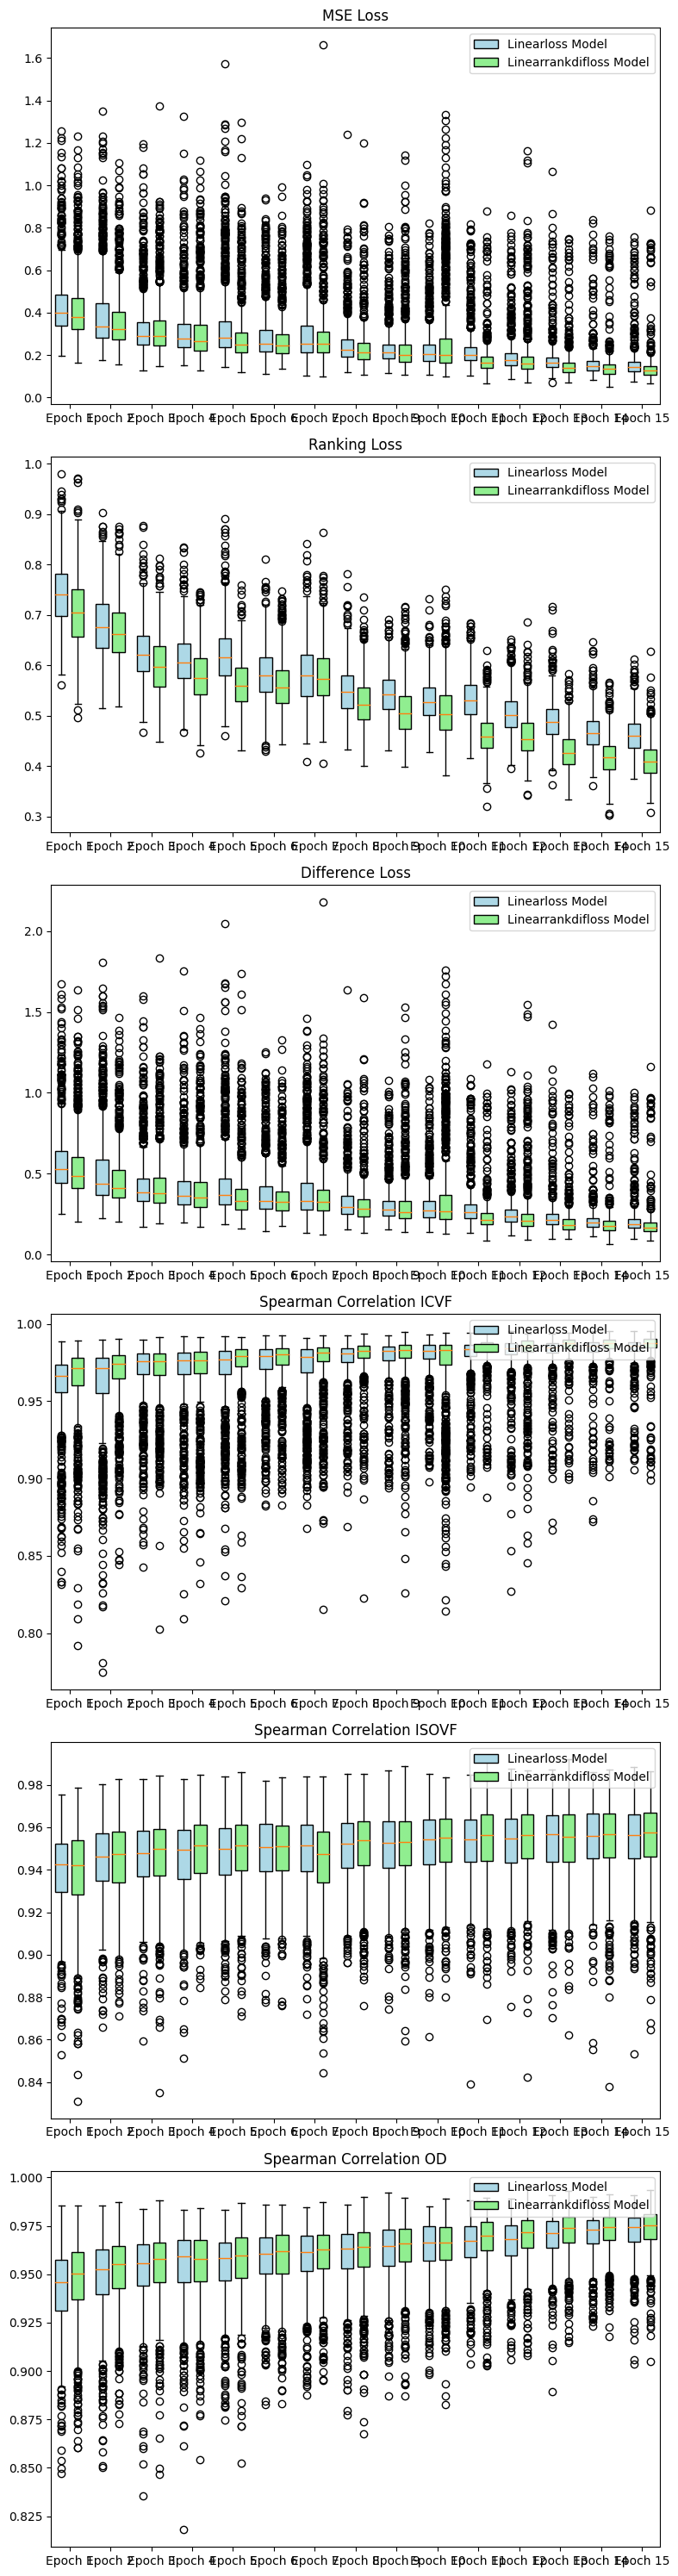

In [1]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time
from rankmoco_loss import rank_moco_loss
from differentmoco_loss import different_moco_loss
from testmodel_linear_v2 import Mymodel
from scipy.stats import spearmanr
import torch.nn as nn

def calculate_correct_counts(predictions, y_test):
    correct_counts = []
    for i in range(predictions.shape[1]):  # 遍历3个指标
        pred_sorted_indices = torch.argsort(predictions[:, i, :], dim=0)
        test_sorted_indices = torch.argsort(y_test[:, i, :], dim=0)
        
        correct = (pred_sorted_indices == test_sorted_indices).sum().item()  # 计算预测序列与真实序列匹配的数量
        correct_counts.append(correct)
        
    return correct_counts

def calculate_spearman_correlation(predictions, y_test):
    spearman_correlations = []
    for i in range(predictions.shape[1]):  # 遍历3个指标
        # 重新塑形为(-1)，因为spearmanr预期的输入是一维数组
        pred = predictions[:, i, :].flatten().cpu().numpy()
        test = y_test[:, i, :].flatten().cpu().numpy()
        
        # 计算斯皮尔曼相关系数
        correlation, _ = spearmanr(pred, test)
        spearman_correlations.append(correlation)
        
    return spearman_correlations

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(r"/data2/mayupeng/test/dwis_1.txt") as f:
    allDwiNames = f.readlines()
with open(r"/data2/mayupeng/test/masks_1.txt") as f:
    allMaskNames = f.readlines()
allFeatureNames = []
with open(r"/data2/mayupeng/test/icvfs_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"/data2/mayupeng/test/isos_1.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"/data2/mayupeng/test/ods_1.txt") as f:
    allFeatureNames.append(f.readlines())
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(3):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]

dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    3,
    1,
    3,
    1,
)

model = Mymodel().to(device)

indices = torch.randperm(len(dwiTraining))[:50000]
X_test_tensor = torch.from_numpy(dwiTraining[indices]).float()
y_test_tensor = torch.from_numpy(featurePatchTraining[indices]).float()

# 创建测试数据的DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True) 

# 模型路径
model_paths = {
    "linearloss": [f"/data2/mayupeng/my_code/testlinear_v2_15/model_epoch_{epoch}.pth" for epoch in range(15)],
    "linearrankdifloss": [f"/data2/mayupeng/my_code/rankdifmocoloss_1_1_lbd_linear_15/model_epoch_{epoch}.pth" for epoch in range(15)]
}
criterion = torch.nn.MSELoss().to(device)
criterion_rank = rank_moco_loss(
        sorter_checkpoint_path="/data2/mayupeng/Tied_rank_best_lstmla_slen_128.pth.tar"
).to(device)
criterion_dif = different_moco_loss().to(device)

# Assuming model_paths is defined somewhere above
# Initialize lists to store metrics for each epoch
mse_losses = {model_type: [] for model_type in model_paths.keys()}
ranking_losses = {model_type: [] for model_type in model_paths.keys()}
difference_losses = {model_type: [] for model_type in model_paths.keys()}
spearman_corrs = [{model_type: [] for model_type in model_paths.keys()} for _ in range(3)]

for model_type, paths in model_paths.items():
    for epoch, model_path in enumerate(paths):
        model.load_state_dict(torch.load(model_path))
        model.eval()

        # Lists to store metrics for the current epoch
        epoch_mse_losses = []
        epoch_ranking_losses = []
        epoch_difference_losses = []
        epoch_spearman_corrs = [[] for _ in range(3)]

        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                if batch_X.size(0) != 64:
                    continue
                output = model(batch_X)
                
                # Calculate and store losses
                mse_loss = criterion(output, batch_y).item()
                ranking_loss = (criterion_rank(output[:, 0, :], batch_y[:, 0, :]) +
                                criterion_rank(output[:, 1, :], batch_y[:, 1, :]) +
                                criterion_rank(output[:, 2, :], batch_y[:, 2, :])).item()
                difference_loss = criterion_dif(output, batch_y).item()
                epoch_mse_losses.append(mse_loss)
                epoch_ranking_losses.append(ranking_loss)
                epoch_difference_losses.append(difference_loss)

                # Calculate and store Spearman correlation
                correlations = calculate_spearman_correlation(output, batch_y)
                for i, corr in enumerate(correlations):
                    epoch_spearman_corrs[i].append(corr)

        # Store metrics for the current epoch
        mse_losses[model_type].append(epoch_mse_losses)
        ranking_losses[model_type].append(epoch_ranking_losses)
        difference_losses[model_type].append(epoch_difference_losses)
        for i in range(3):
            spearman_corrs[i][model_type].append(epoch_spearman_corrs[i])
            

def plot_and_print_metrics(metrics_dicts, titles):
    fig, axs = plt.subplots(6, 1, figsize=(8, 30))  # 为六个度量创建6个子图
    
    for idx, (metrics, title) in enumerate(zip(metrics_dicts, titles)):
        ax = axs[idx]  # 选择对应的子图
        epochs = range(1, len(metrics['linearloss']) + 1)  # 假设有相同数量的epochs
        data_rankdif = [np.array(epoch_data) for epoch_data in metrics['linearloss']]
        data_rankdifmoco = [np.array(epoch_data) for epoch_data in metrics['linearrankdifloss']]

        # 打印均值和标准差
        print(f"{title} - Linearloss Model:")
        for i, epoch_data in enumerate(data_rankdif):
            print(f"  Epoch {i+1}: Mean = {np.mean(epoch_data):.4f}, Std = {np.std(epoch_data):.4f}")
        print(f"{title} - Linearrankdifloss Model:")
        for i, epoch_data in enumerate(data_rankdifmoco):
            print(f"  Epoch {i+1}: Mean = {np.mean(epoch_data):.4f}, Std = {np.std(epoch_data):.4f}")
        print("\n")

        bp1 = ax.boxplot(data_rankdif, positions=np.array(range(len(data_rankdif)))*2.0-0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        bp2 = ax.boxplot(data_rankdifmoco, positions=np.array(range(len(data_rankdifmoco)))*2.0+0.4, widths=0.6,patch_artist=True, boxprops=dict(facecolor="lightgreen"))

        ax.set_xticks(range(0, len(epochs) * 2, 2))
        ax.set_xticklabels([f"Epoch {epoch}" for epoch in epochs])
        ax.set_title(title)
        ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Linearloss Model', 'Linearrankdifloss Model'],loc='upper right')

    plt.tight_layout()
    plt.show()

# 将所有需要绘制的数据以及其标题打包
metrics_dicts = [mse_losses, ranking_losses, difference_losses,spearman_corrs[0],spearman_corrs[1],spearman_corrs[2]]  
titles = ['MSE Loss', 'Ranking Loss', 'Difference Loss', 'Spearman Correlation ICVF', 'Spearman Correlation ISOVF', 'Spearman Correlation OD']

# Assuming metrics_dicts and titles are defined as before
plot_and_print_metrics(metrics_dicts, titles)

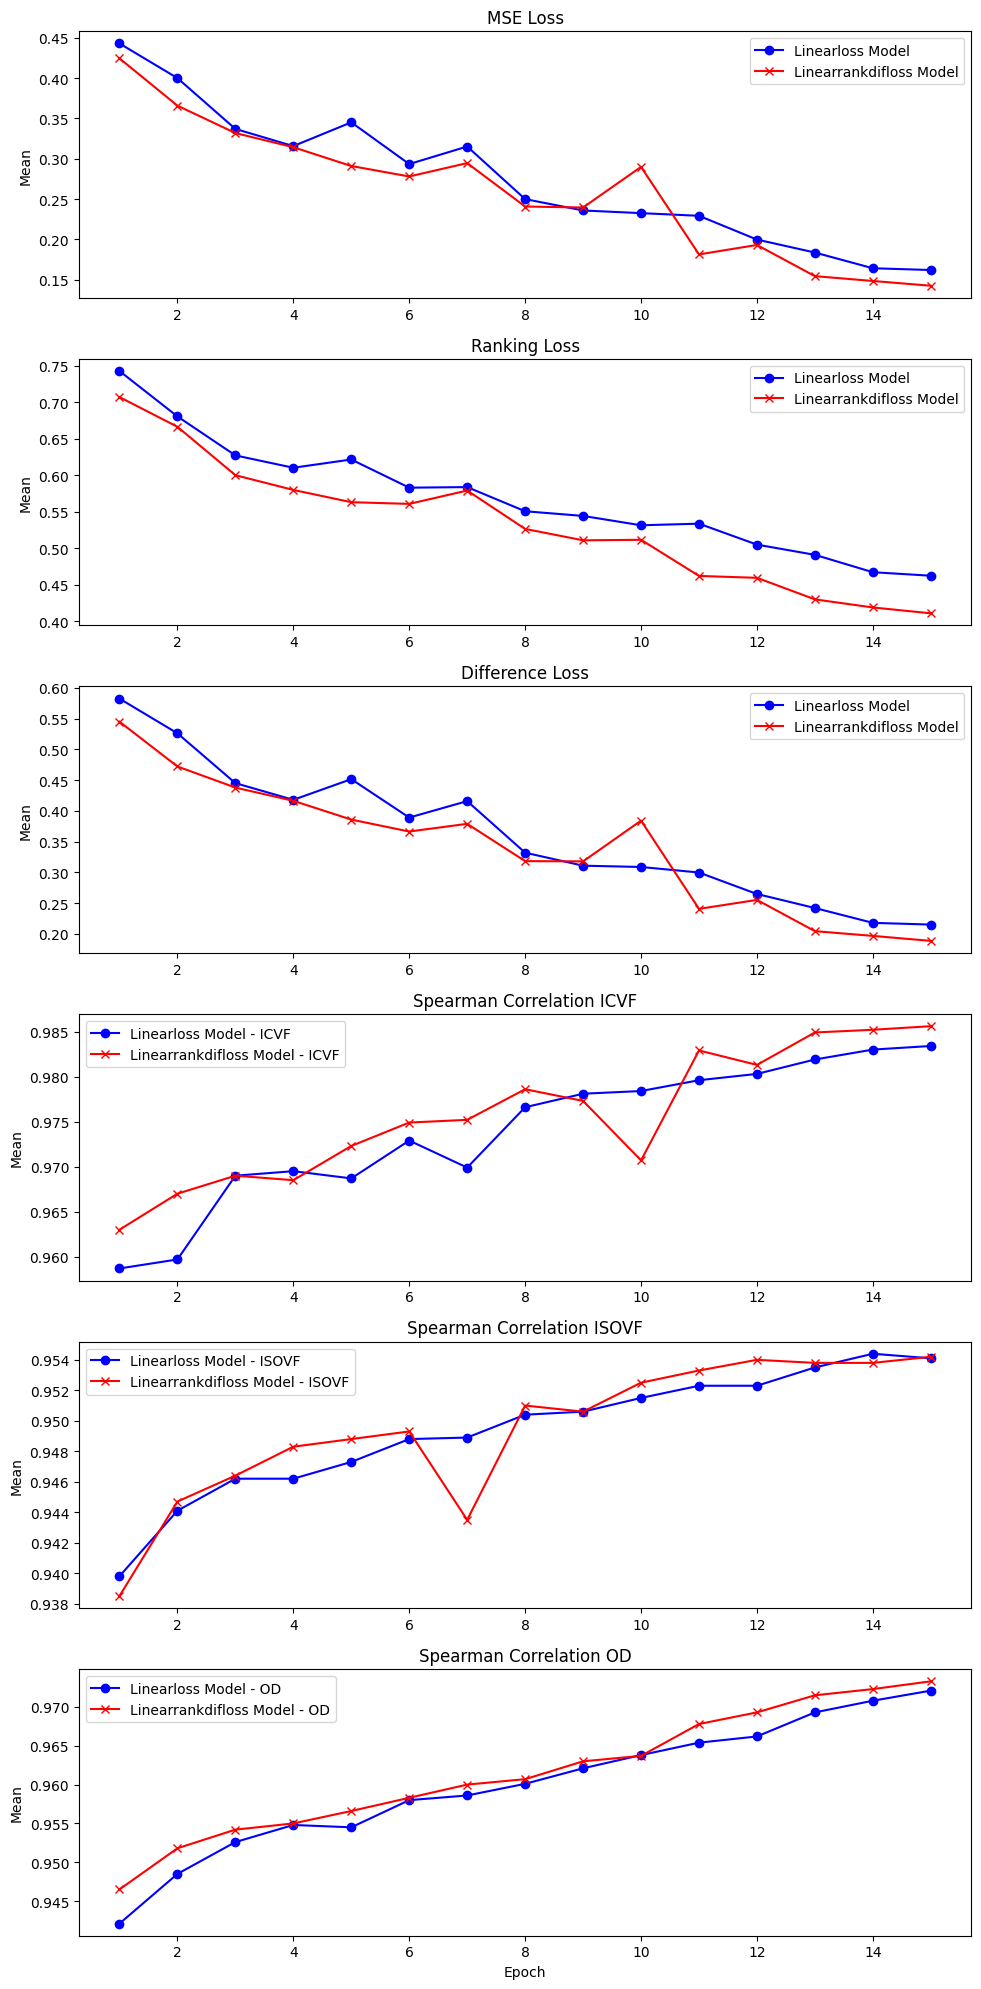

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
epochs = np.arange(1, 16)

# MSE Loss
mse_loss_rankdifloss_means = np.array([0.4431, 
0.4001, 
0.3370, 
0.3157, 
0.3452, 
0.2934, 
0.3152, 
0.2499, 
0.2358, 
 0.2325,
 0.2292,
 0.1997,
 0.1836,
 0.1641,
 0.1619])
mse_loss_rankdifmoco_means = np.array([0.4246, 
0.3659, 
0.3319, 
0.3143, 
0.2910, 
0.2780, 
0.2946, 
0.2407, 
0.2395, 
 0.2899,
 0.1813,
 0.1930,
 0.1543,
 0.1483,
 0.1424])

# Ranking Loss
ranking_loss_rankdifloss_means = np.array([0.7431, 
0.6809, 
0.6275, 
0.6106, 
0.6219, 
0.5833, 
0.5841, 
0.5510, 
0.5446, 
 0.5318,
 0.5340,
 0.5053,
 0.4913,
 0.4675,
 0.4627])
ranking_loss_rankdifmoco_means = np.array([0.7074, 
0.6667, 
0.6004, 
0.5802, 
0.5634, 
0.5611, 
0.5794, 
0.5268, 
0.5112, 
 0.5119,
 0.4624,
 0.4598,
 0.4303,
 0.4192,
 0.4112])

# Difference Loss
difference_loss_rankdifloss_means = np.array([0.5824, 
0.5260, 
0.4450, 
0.4179, 
0.4515, 
0.3891, 
0.4158, 
0.3320, 
0.3109, 
 0.3088,
 0.2998,
 0.2649,
 0.2421,
 0.2180,
 0.2152])
difference_loss_rankdifmoco_means = np.array([0.5449, 
0.4721, 
0.4378, 
0.4163, 
0.3858, 
0.3664, 
0.3789, 
0.3183, 
0.3179, 
 0.3841,
 0.2407,
 0.2553,
 0.2045,
 0.1968,
 0.1887])

# Spearman Correlation ICVF
spearman_icvf_rankdifloss_means = np.array([0.9587, 
0.9597, 
0.9690, 
0.9695, 
0.9687, 
0.9729, 
0.9699, 
0.9766, 
0.9781, 
 0.9784,
 0.9796,
 0.9803,
 0.9819,
 0.9830,
 0.9834])
spearman_icvf_rankdifmoco_means = np.array([0.9630, 
0.9670, 
0.9690, 
0.9685, 
0.9723, 
0.9749, 
0.9752, 
0.9786, 
0.9773, 
 0.9707,
 0.9829,
 0.9813,
 0.9849,
 0.9852,
 0.9856])

# Spearman Correlation ISOVF
spearman_isovf_rankdifloss_means = np.array([0.9398, 
0.9441, 
0.9462, 
0.9462, 
0.9473, 
0.9488, 
0.9489, 
0.9504, 
0.9506, 
 0.9515,
 0.9523,
 0.9523,
 0.9535,
 0.9544,
 0.9541])
spearman_isovf_rankdifmoco_means = np.array([0.9385, 
0.9447, 
0.9464, 
0.9483, 
0.9488, 
0.9493, 
0.9435, 
0.9510, 
0.9506, 
 0.9525,
 0.9533,
 0.9540,
 0.9538,
 0.9538,
 0.9542])

# Spearman Correlation OD
spearman_od_rankdifloss_means = np.array([0.9421, 
0.9485, 
0.9526, 
0.9548, 
0.9545, 
0.9580, 
0.9586, 
0.9601, 
0.9621, 
 0.9638,
 0.9654,
 0.9662,
 0.9693,
 0.9708,
 0.9721])
spearman_od_rankdifmoco_means = np.array([0.9465, 
0.9518, 
0.9542, 
0.9550, 
0.9566, 
0.9583, 
0.9600, 
0.9607, 
0.9630, 
 0.9637,
 0.9678,
 0.9693,
 0.9715,
 0.9723,
 0.9733])

# Plotting
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

axs[0].plot(epochs, mse_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[0].plot(epochs, mse_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[0].set_title('MSE Loss')
axs[0].set_ylabel('Mean')
axs[0].legend()

# 绘制Ranking Loss - RankDifLoss和RankDifmocoLoss模型
axs[1].plot(epochs, ranking_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[1].plot(epochs, ranking_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[1].set_title('Ranking Loss')
axs[1].set_ylabel('Mean')
axs[1].legend()

# 绘制Difference Loss - RankDifLoss和RankDifmocoLoss模型
axs[2].plot(epochs, difference_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[2].plot(epochs, difference_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[2].set_title('Difference Loss')
axs[2].set_ylabel('Mean')
axs[2].legend()

# 绘制Spearman Correlation ICVF - RankDifLoss和RankDifmocoLoss模型
axs[3].plot(epochs, spearman_icvf_rankdifloss_means, label='Linearloss Model - ICVF', marker='o', linestyle='-', color='blue')
axs[3].plot(epochs, spearman_icvf_rankdifmoco_means, label='Linearrankdifloss Model - ICVF', marker='x', linestyle='-', color='red')
axs[3].set_title('Spearman Correlation ICVF')
axs[3].set_ylabel('Mean')
axs[3].legend()

axs[4].plot(epochs, spearman_isovf_rankdifloss_means, label='Linearloss Model - ISOVF', marker='o', linestyle='-', color='blue')
axs[4].plot(epochs, spearman_isovf_rankdifmoco_means, label='Linearrankdifloss Model - ISOVF', marker='x', linestyle='-', color='red')
axs[4].set_title('Spearman Correlation ISOVF')
axs[4].set_ylabel('Mean')
axs[4].legend()

# 绘制Spearman Correlation OD - RankDifLoss和RankDifmocoLoss模型
axs[5].plot(epochs, spearman_od_rankdifloss_means, label='Linearloss Model - OD', marker='o', linestyle='-', color='blue')
axs[5].plot(epochs, spearman_od_rankdifmoco_means, label='Linearrankdifloss Model - OD', marker='x', linestyle='-', color='red')
axs[5].set_title('Spearman Correlation OD')
axs[5].set_xlabel('Epoch')  # 注意设置X轴标签
axs[5].set_ylabel('Mean')
axs[5].legend()

plt.tight_layout()
plt.show()

Counting Patches for Subject 0
Counting Voxels for Subject 0
Normalizing Microstructure
Examining Voxels for Subject: 0
scales:
Setting Patch List for Subject: 0
MSE Loss - Linearloss Model:
  Epoch 1: Mean = 0.4284, Std = 0.1256
  Epoch 2: Mean = 0.3919, Std = 0.1496
  Epoch 3: Mean = 0.3446, Std = 0.1225
  Epoch 4: Mean = 0.3351, Std = 0.1188
  Epoch 5: Mean = 0.3610, Std = 0.1559
  Epoch 6: Mean = 0.3267, Std = 0.1205
  Epoch 7: Mean = 0.3475, Std = 0.1563
  Epoch 8: Mean = 0.3314, Std = 0.1124
  Epoch 9: Mean = 0.3418, Std = 0.1229
  Epoch 10: Mean = 0.3443, Std = 0.1274
  Epoch 11: Mean = 0.3556, Std = 0.1479
  Epoch 12: Mean = 0.3595, Std = 0.1456
  Epoch 13: Mean = 0.3694, Std = 0.1596
  Epoch 14: Mean = 0.3786, Std = 0.1730
  Epoch 15: Mean = 0.3825, Std = 0.1686
MSE Loss - Linearrankdifloss Model:
  Epoch 1: Mean = 0.3878, Std = 0.1206
  Epoch 2: Mean = 0.3805, Std = 0.1335
  Epoch 3: Mean = 0.3348, Std = 0.1252
  Epoch 4: Mean = 0.3486, Std = 0.1471
  Epoch 5: Mean = 0.3351, 

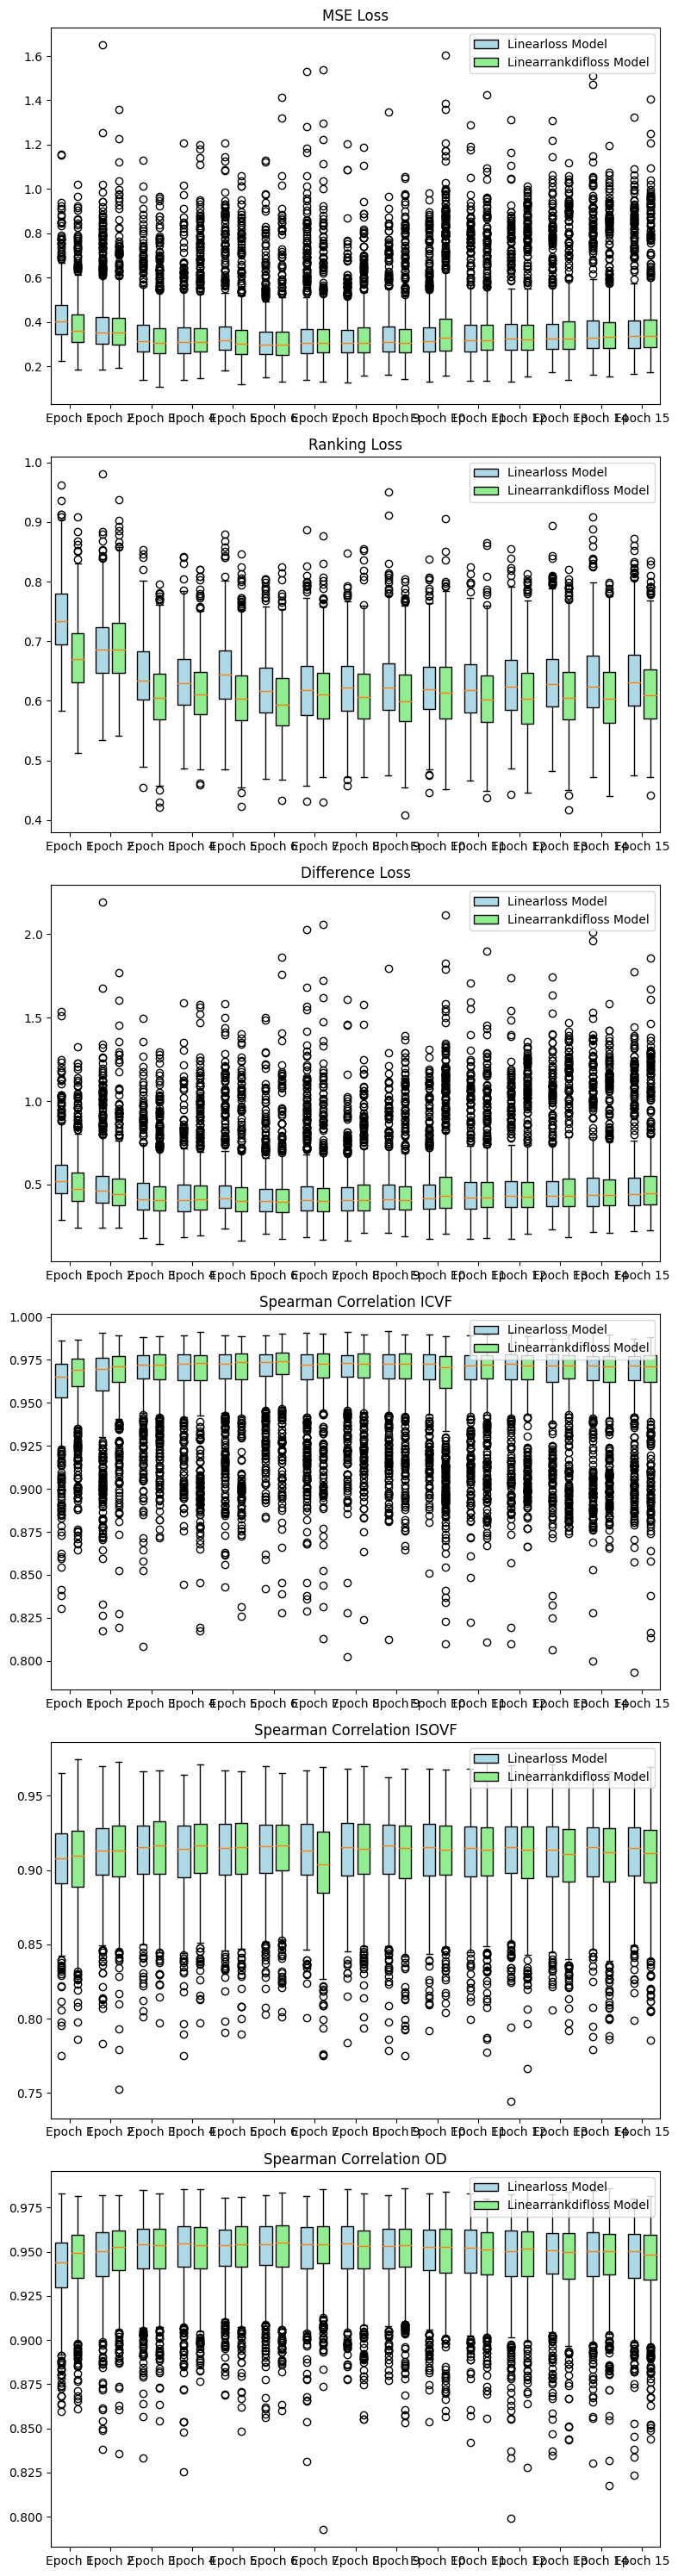

In [1]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time
from rankmoco_loss import rank_moco_loss
from differentmoco_loss import different_moco_loss
from testmodel_linear_v2 import Mymodel
from scipy.stats import spearmanr
import torch.nn as nn

def calculate_correct_counts(predictions, y_test):
    correct_counts = []
    for i in range(predictions.shape[1]):  # 遍历3个指标
        pred_sorted_indices = torch.argsort(predictions[:, i, :], dim=0)
        test_sorted_indices = torch.argsort(y_test[:, i, :], dim=0)
        
        correct = (pred_sorted_indices == test_sorted_indices).sum().item()  # 计算预测序列与真实序列匹配的数量
        correct_counts.append(correct)
        
    return correct_counts

def calculate_spearman_correlation(predictions, y_test):
    spearman_correlations = []
    for i in range(predictions.shape[1]):  # 遍历3个指标
        # 重新塑形为(-1)，因为spearmanr预期的输入是一维数组
        pred = predictions[:, i, :].flatten().cpu().numpy()
        test = y_test[:, i, :].flatten().cpu().numpy()
        
        # 计算斯皮尔曼相关系数
        correlation, _ = spearmanr(pred, test)
        spearman_correlations.append(correlation)
        
    return spearman_correlations

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(r"/data2/mayupeng/test/dwis_2.txt") as f:
    allDwiNames = f.readlines()
with open(r"/data2/mayupeng/test/masks_2.txt") as f:
    allMaskNames = f.readlines()
allFeatureNames = []
with open(r"/data2/mayupeng/test/icvfs_2.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"/data2/mayupeng/test/isos_2.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"/data2/mayupeng/test/ods_2.txt") as f:
    allFeatureNames.append(f.readlines())
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(3):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]

dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    3,
    1,
    3,
    1,
)

model = Mymodel().to(device)

indices = torch.randperm(len(dwiTraining))[:50000]
X_test_tensor = torch.from_numpy(dwiTraining[indices]).float()
y_test_tensor = torch.from_numpy(featurePatchTraining[indices]).float()

# 创建测试数据的DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True) 

# 模型路径
model_paths = {
    "linearloss": [f"/data2/mayupeng/my_code/testlinear_v2_15/model_epoch_{epoch}.pth" for epoch in range(15)],
    "linearrankdifloss": [f"/data2/mayupeng/my_code/rankdifmocoloss_1_1_lbd_linear_15/model_epoch_{epoch}.pth" for epoch in range(15)]
}
criterion = torch.nn.MSELoss().to(device)
criterion_rank = rank_moco_loss(
        sorter_checkpoint_path="/data2/mayupeng/Tied_rank_best_lstmla_slen_128.pth.tar"
).to(device)
criterion_dif = different_moco_loss().to(device)

# Assuming model_paths is defined somewhere above
# Initialize lists to store metrics for each epoch
mse_losses = {model_type: [] for model_type in model_paths.keys()}
ranking_losses = {model_type: [] for model_type in model_paths.keys()}
difference_losses = {model_type: [] for model_type in model_paths.keys()}
spearman_corrs = [{model_type: [] for model_type in model_paths.keys()} for _ in range(3)]

for model_type, paths in model_paths.items():
    for epoch, model_path in enumerate(paths):
        model.load_state_dict(torch.load(model_path))
        model.eval()

        # Lists to store metrics for the current epoch
        epoch_mse_losses = []
        epoch_ranking_losses = []
        epoch_difference_losses = []
        epoch_spearman_corrs = [[] for _ in range(3)]

        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                if batch_X.size(0) != 64:
                    continue
                output = model(batch_X)

                # Calculate and store losses
                mse_loss = criterion(output, batch_y).item()
                ranking_loss = (criterion_rank(output[:, 0, :], batch_y[:, 0, :]) +
                                criterion_rank(output[:, 1, :], batch_y[:, 1, :]) +
                                criterion_rank(output[:, 2, :], batch_y[:, 2, :])).item()
                difference_loss = criterion_dif(output, batch_y).item()
                epoch_mse_losses.append(mse_loss)
                epoch_ranking_losses.append(ranking_loss)
                epoch_difference_losses.append(difference_loss)

                # Calculate and store Spearman correlation
                correlations = calculate_spearman_correlation(output, batch_y)
                for i, corr in enumerate(correlations):
                    epoch_spearman_corrs[i].append(corr)

        # Store metrics for the current epoch
        mse_losses[model_type].append(epoch_mse_losses)
        ranking_losses[model_type].append(epoch_ranking_losses)
        difference_losses[model_type].append(epoch_difference_losses)
        for i in range(3):
            spearman_corrs[i][model_type].append(epoch_spearman_corrs[i])
            

def plot_and_print_metrics(metrics_dicts, titles):
    fig, axs = plt.subplots(6, 1, figsize=(8, 30))  # 为六个度量创建6个子图
    
    for idx, (metrics, title) in enumerate(zip(metrics_dicts, titles)):
        ax = axs[idx]  # 选择对应的子图
        epochs = range(1, len(metrics['linearloss']) + 1)  # 假设有相同数量的epochs
        data_rankdif = [np.array(epoch_data) for epoch_data in metrics['linearloss']]
        data_rankdifmoco = [np.array(epoch_data) for epoch_data in metrics['linearrankdifloss']]

        # 打印均值和标准差
        print(f"{title} - Linearloss Model:")
        for i, epoch_data in enumerate(data_rankdif):
            print(f"  Epoch {i+1}: Mean = {np.mean(epoch_data):.4f}, Std = {np.std(epoch_data):.4f}")
        print(f"{title} - Linearrankdifloss Model:")
        for i, epoch_data in enumerate(data_rankdifmoco):
            print(f"  Epoch {i+1}: Mean = {np.mean(epoch_data):.4f}, Std = {np.std(epoch_data):.4f}")
        print("\n")

        bp1 = ax.boxplot(data_rankdif, positions=np.array(range(len(data_rankdif)))*2.0-0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        bp2 = ax.boxplot(data_rankdifmoco, positions=np.array(range(len(data_rankdifmoco)))*2.0+0.4, widths=0.6,patch_artist=True, boxprops=dict(facecolor="lightgreen"))

        ax.set_xticks(range(0, len(epochs) * 2, 2))
        ax.set_xticklabels([f"Epoch {epoch}" for epoch in epochs])
        ax.set_title(title)
        ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Linearloss Model', 'Linearrankdifloss Model'],loc='upper right')

    plt.tight_layout()
    plt.show()

# 将所有需要绘制的数据以及其标题打包
metrics_dicts = [mse_losses, ranking_losses, difference_losses,spearman_corrs[0],spearman_corrs[1],spearman_corrs[2]]  
titles = ['MSE Loss', 'Ranking Loss', 'Difference Loss', 'Spearman Correlation ICVF', 'Spearman Correlation ISOVF', 'Spearman Correlation OD']

# Assuming metrics_dicts and titles are defined as before
plot_and_print_metrics(metrics_dicts, titles)

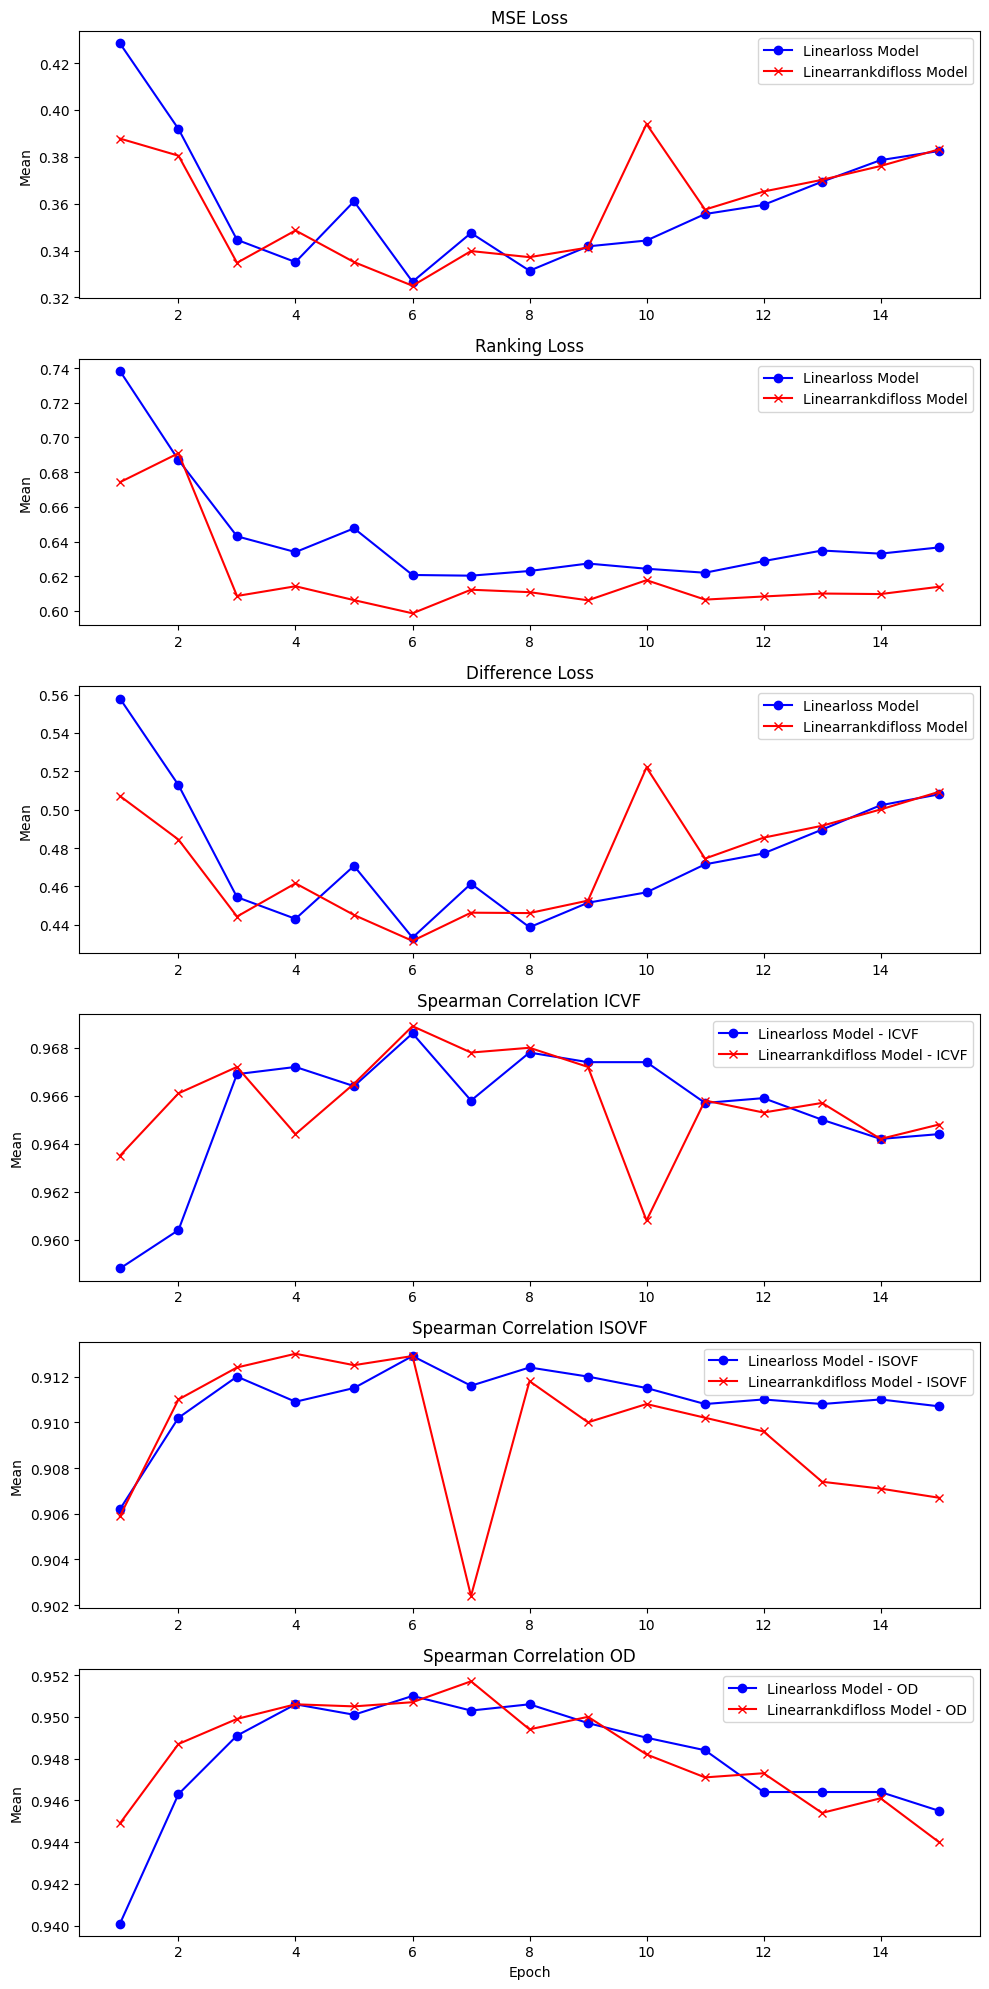

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data preparation
epochs = np.arange(1, 16)

# MSE Loss
mse_loss_rankdifloss_means = np.array([0.4284, 
0.3919, 
0.3446, 
0.3351, 
0.3610, 
0.3267, 
0.3475, 
0.3314, 
0.3418, 
 0.3443,
 0.3556,
 0.3595,
 0.3694,
 0.3786,
 0.3825])
mse_loss_rankdifmoco_means = np.array([0.3878, 
0.3805, 
0.3348, 
0.3486, 
0.3351, 
0.3250, 
0.3398, 
0.3372, 
0.3413, 
 0.3940,
 0.3575,
 0.3652,
 0.3702,
 0.3761,
 0.3832])

# Ranking Loss
ranking_loss_rankdifloss_means = np.array([0.7383, 
0.6870, 
0.6430, 
0.6339, 
0.6476, 
0.6207, 
0.6203, 
0.6230, 
0.6273, 
 0.6243,
 0.6220,
 0.6287,
 0.6348,
 0.6330,
 0.6366])
ranking_loss_rankdifmoco_means = np.array([0.6742, 
0.6909, 
0.6086, 
0.6142, 
0.6062, 
0.5986, 
0.6122, 
0.6108, 
0.6061, 
 0.6177,
 0.6065,
 0.6083,
 0.6100,
 0.6097,
 0.6139])

# Difference Loss
difference_loss_rankdifloss_means = np.array([0.5579, 
0.5128, 
0.4544, 
0.4431, 
0.4707, 
0.4333, 
0.4614, 
0.4387, 
0.4515, 
 0.4569,
 0.4715,
 0.4772,
 0.4896,
 0.5023,
 0.5080])
difference_loss_rankdifmoco_means = np.array([0.5071, 
0.4844, 
0.4443, 
0.4616, 
0.4451, 
0.4316, 
0.4463, 
0.4461, 
0.4526, 
 0.5220,
 0.4745,
 0.4854,
 0.4916,
 0.5001,
 0.5093])

# Spearman Correlation ICVF
spearman_icvf_rankdifloss_means = np.array([0.9588, 
0.9604, 
0.9669, 
0.9672, 
0.9664, 
0.9686, 
0.9658, 
0.9678, 
0.9674, 
 0.9674,
 0.9657,
 0.9659,
 0.9650,
 0.9642,
 0.9644])
spearman_icvf_rankdifmoco_means = np.array([0.9635, 
0.9661, 
0.9672, 
0.9644, 
0.9665, 
0.9689, 
0.9678, 
0.9680, 
0.9672, 
 0.9608,
 0.9658,
 0.9653,
 0.9657,
 0.9642,
 0.9648])

# Spearman Correlation ISOVF
spearman_isovf_rankdifloss_means = np.array([0.9062, 
0.9102, 
0.9120, 
0.9109, 
0.9115, 
0.9129, 
0.9116, 
0.9124, 
0.9120, 
 0.9115,
 0.9108,
 0.9110,
 0.9108,
 0.9110,
 0.9107])
spearman_isovf_rankdifmoco_means = np.array([0.9059, 
0.9110, 
0.9124, 
0.9130, 
0.9125, 
0.9129, 
0.9024, 
0.9118, 
0.9100, 
 0.9108,
 0.9102,
 0.9096,
 0.9074,
 0.9071,
 0.9067])

# Spearman Correlation OD
spearman_od_rankdifloss_means = np.array([0.9401, 
0.9463, 
0.9491, 
0.9506, 
0.9501, 
0.9510, 
0.9503, 
0.9506, 
0.9497, 
 0.9490,
 0.9484,
 0.9464,
 0.9464,
 0.9464,
 0.9455])
spearman_od_rankdifmoco_means = np.array([0.9449, 
0.9487, 
0.9499, 
0.9506, 
0.9505, 
0.9507, 
0.9517, 
0.9494, 
0.9500, 
 0.9482,
 0.9471,
 0.9473,
 0.9454,
 0.9461,
 0.9440])

# Plotting
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

axs[0].plot(epochs, mse_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[0].plot(epochs, mse_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[0].set_title('MSE Loss')
axs[0].set_ylabel('Mean')
axs[0].legend()

# 绘制Ranking Loss - RankDifLoss和RankDifmocoLoss模型
axs[1].plot(epochs, ranking_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[1].plot(epochs, ranking_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[1].set_title('Ranking Loss')
axs[1].set_ylabel('Mean')
axs[1].legend()

# 绘制Difference Loss - RankDifLoss和RankDifmocoLoss模型
axs[2].plot(epochs, difference_loss_rankdifloss_means, label='Linearloss Model', marker='o', linestyle='-', color='blue')
axs[2].plot(epochs, difference_loss_rankdifmoco_means, label='Linearrankdifloss Model', marker='x', linestyle='-', color='red')
axs[2].set_title('Difference Loss')
axs[2].set_ylabel('Mean')
axs[2].legend()

# 绘制Spearman Correlation ICVF - RankDifLoss和RankDifmocoLoss模型
axs[3].plot(epochs, spearman_icvf_rankdifloss_means, label='Linearloss Model - ICVF', marker='o', linestyle='-', color='blue')
axs[3].plot(epochs, spearman_icvf_rankdifmoco_means, label='Linearrankdifloss Model - ICVF', marker='x', linestyle='-', color='red')
axs[3].set_title('Spearman Correlation ICVF')
axs[3].set_ylabel('Mean')
axs[3].legend()

axs[4].plot(epochs, spearman_isovf_rankdifloss_means, label='Linearloss Model - ISOVF', marker='o', linestyle='-', color='blue')
axs[4].plot(epochs, spearman_isovf_rankdifmoco_means, label='Linearrankdifloss Model - ISOVF', marker='x', linestyle='-', color='red')
axs[4].set_title('Spearman Correlation ISOVF')
axs[4].set_ylabel('Mean')
axs[4].legend()

# 绘制Spearman Correlation OD - RankDifLoss和RankDifmocoLoss模型
axs[5].plot(epochs, spearman_od_rankdifloss_means, label='Linearloss Model - OD', marker='o', linestyle='-', color='blue')
axs[5].plot(epochs, spearman_od_rankdifmoco_means, label='Linearrankdifloss Model - OD', marker='x', linestyle='-', color='red')
axs[5].set_title('Spearman Correlation OD')
axs[5].set_xlabel('Epoch')  # 注意设置X轴标签
axs[5].set_ylabel('Mean')
axs[5].legend()

plt.tight_layout()
plt.show()

In [4]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time
from rankmoco_loss import rank_moco_loss
from differentmoco_loss import different_moco_loss
from testmodel_gpt_v2 import Mymodel
from torchsummary import summary

os.environ['CUDA_VISIBLE_DEVICES'] = '3'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if __name__ == "__main__":
    model = Mymodel().to(device)
    # Move model to CPU for summary
    summary(model, input_size=(60, 27))
    # Move model back to GPU for further training or inference
    model.to(device)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1          [-1, 32, 3, 3, 3]          51,840
       BatchNorm3d-2          [-1, 32, 3, 3, 3]              64
              ReLU-3          [-1, 32, 3, 3, 3]               0
            Conv3d-4          [-1, 32, 3, 3, 3]             864
            Conv3d-5          [-1, 32, 3, 3, 3]           1,024
       BatchNorm3d-6          [-1, 32, 3, 3, 3]              64
              ReLU-7          [-1, 32, 3, 3, 3]               0
            Conv3d-8          [-1, 32, 3, 3, 3]           1,024
       BatchNorm3d-9          [-1, 32, 3, 3, 3]              64
AdaptiveAvgPool3d-10          [-1, 32, 1, 1, 1]               0
           Linear-11                    [-1, 4]             128
             ReLU-12                    [-1, 4]               0
           Linear-13                   [-1, 32]             128
          Sigmoid-14                   

In [1]:
import sys
import os
import nibabel as nib
import numpy as np
from input_parser import input_parser
from data_loader import load_training_matrix, load_test_matrix, data_combine_matrix
import nibabel.processing
from torch.utils.data import random_split
import time
from tqdm import trange
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import torch.optim as optim
import time
from rankmoco_loss import rank_moco_loss
from differentmoco_loss import different_moco_loss
from testmodel_linear_v2 import Mymodel
from scipy.stats import spearmanr
import torch.nn as nn

def calculate_correct_counts(predictions, y_test):
    correct_counts = []
    for i in range(predictions.shape[1]):  # 遍历3个指标
        pred_sorted_indices = torch.argsort(predictions[:, i, :], dim=0)
        test_sorted_indices = torch.argsort(y_test[:, i, :], dim=0)
        
        correct = (pred_sorted_indices == test_sorted_indices).sum().item()  # 计算预测序列与真实序列匹配的数量
        correct_counts.append(correct)
        
    return correct_counts

def calculate_spearman_correlation(predictions, y_test):
    spearman_correlations = []
    for i in range(predictions.shape[1]):  # 遍历3个指标
        # 重新塑形为(-1)，因为spearmanr预期的输入是一维数组
        pred = predictions[:, i, :].flatten().cpu().numpy()
        test = y_test[:, i, :].flatten().cpu().numpy()
        
        # 计算斯皮尔曼相关系数
        correlation, _ = spearmanr(pred, test)
        spearman_correlations.append(correlation)
        
    return spearman_correlations

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open(r"/data2/mayupeng/test/dwis_2.txt") as f:
    allDwiNames = f.readlines()
with open(r"/data2/mayupeng/test/masks_2.txt") as f:
    allMaskNames = f.readlines()
allFeatureNames = []
with open(r"/data2/mayupeng/test/icvfs_2.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"/data2/mayupeng/test/isos_2.txt") as f:
    allFeatureNames.append(f.readlines())
with open(r"/data2/mayupeng/test/ods_2.txt") as f:
    allFeatureNames.append(f.readlines())
allDwiNames = [x.strip("\n") for x in allDwiNames]
allMaskNames = [x.strip("\n") for x in allMaskNames]
for feature_index in range(3):
    allFeatureNames[feature_index] = [
        x.strip("\n") for x in allFeatureNames[feature_index]
    ]

dwiTraining, featurePatchTraining, scales = load_training_matrix(
    allDwiNames,
    allMaskNames,
    allFeatureNames,
    3,
    1,
    3,
    1,
)

model = Mymodel().to(device)

indices = torch.randperm(len(dwiTraining))[:200000]
X_test_tensor = torch.from_numpy(dwiTraining[indices]).float()
y_test_tensor = torch.from_numpy(featurePatchTraining[indices]).float()

# 创建测试数据的DataLoader
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True) 

# 模型路径
model_paths = {
    "linearloss": [f"/data2/mayupeng/my_code/testlinear_v2_15/model_epoch_{epoch}.pth" for epoch in range(15)],
    "linearrankdifloss": [f"/data2/mayupeng/my_code/rankdifmocoloss_1_1_lbd_linear_15/model_epoch_{epoch}.pth" for epoch in range(15)]
}
criterion = torch.nn.MSELoss().to(device)
criterion_rank = rank_moco_loss(
        sorter_checkpoint_path="/data2/mayupeng/Tied_rank_best_lstmla_slen_128.pth.tar"
).to(device)
criterion_dif = different_moco_loss().to(device)
# 初始化存储每个指标的度量字典
metrics = {
    model_key: {
        'mse': {i: [] for i in range(3)},
        'ranking_loss': {i: [] for i in range(3)},
        'difference_loss': {i: [] for i in range(3)},
        'spearman': {i: [] for i in range(3)}
    } for model_key in model_paths
}

# 模型评估
for model_key, paths in model_paths.items():
    for epoch, model_path in enumerate(paths):
        model.load_state_dict(torch.load(model_path))
        model.eval()

        epoch_data = {key: {i: [] for i in range(3)} for key in metrics[model_key].keys()}
        
        for data in test_loader:
            inputs, targets = data
            inputs, targets = inputs.to(device), targets.to(device)
            if inputs.size(0) != 64:
                    continue
            outputs = model(inputs)
            with torch.no_grad():
                for i in range(3):
                    indicator_output = outputs[:, i, :]
                    indicator_target = targets[:, i, :]
                    mse = criterion(indicator_output, indicator_target).item()
                    ranking_loss = criterion_rank(indicator_output, indicator_target).item()
                    difference_loss = criterion_dif(indicator_output, indicator_target).item()
                    
                    epoch_data['mse'][i].append(mse)
                    epoch_data['ranking_loss'][i].append(ranking_loss)
                    epoch_data['difference_loss'][i].append(difference_loss)
          
                spearman_correlations = calculate_spearman_correlation(outputs, targets)
                for i, corr in enumerate(spearman_correlations):
                    epoch_data['spearman'][i].append(corr)

        for key in epoch_data:
            for i in range(3):
                average = np.mean(epoch_data[key][i])
                metrics[model_key][key][i].append(average)
                # 打印每个指标的epoch均值
                print(f"{model_key} - Epoch {epoch+1} - {key} - Indicator {i+1}: Mean = {average:.4f}")


Counting Patches for Subject 0
Counting Voxels for Subject 0
Normalizing Microstructure
Examining Voxels for Subject: 0
scales:
Setting Patch List for Subject: 0
linearloss - Epoch 1 - mse - Indicator 1: Mean = 0.4678
linearloss - Epoch 1 - mse - Indicator 2: Mean = 0.1610
linearloss - Epoch 1 - mse - Indicator 3: Mean = 0.6429
linearloss - Epoch 1 - ranking_loss - Indicator 1: Mean = 0.2711
linearloss - Epoch 1 - ranking_loss - Indicator 2: Mean = 0.1401
linearloss - Epoch 1 - ranking_loss - Indicator 3: Mean = 0.3258
linearloss - Epoch 1 - difference_loss - Indicator 1: Mean = 0.5937
linearloss - Epoch 1 - difference_loss - Indicator 2: Mean = 0.2138
linearloss - Epoch 1 - difference_loss - Indicator 3: Mean = 0.8492
linearloss - Epoch 1 - spearman - Indicator 1: Mean = 0.9596
linearloss - Epoch 1 - spearman - Indicator 2: Mean = 0.9058
linearloss - Epoch 1 - spearman - Indicator 3: Mean = 0.9396
linearloss - Epoch 2 - mse - Indicator 1: Mean = 0.4524
linearloss - Epoch 2 - mse - Ind

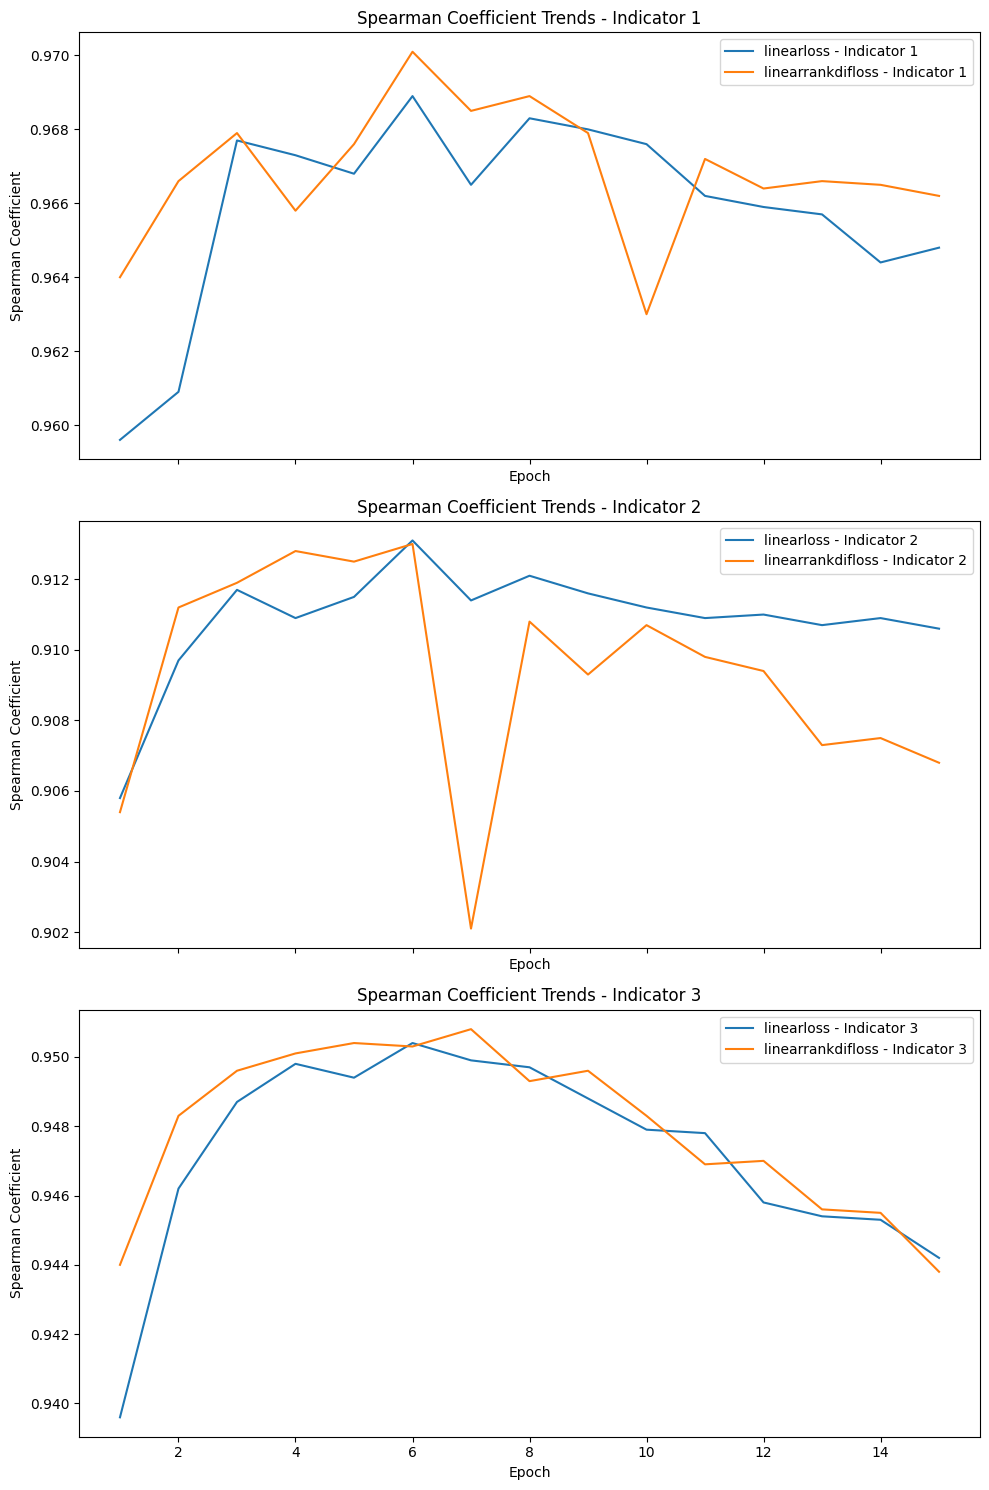

In [1]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 16))

# Spearman Coefficients for each indicator and model
spearman_data = {
    'linearloss': {
        'Indicator 1': [0.9596, 0.9609, 0.9677, 0.9673, 0.9668, 0.9689, 0.9665, 0.9683, 0.9680, 0.9676, 0.9662, 0.9659, 0.9657, 0.9644, 0.9648],
        'Indicator 2': [0.9058, 0.9097, 0.9117, 0.9109, 0.9115, 0.9131, 0.9114, 0.9121, 0.9116, 0.9112, 0.9109, 0.9110, 0.9107, 0.9109, 0.9106],
        'Indicator 3': [0.9396, 0.9462, 0.9487, 0.9498, 0.9494, 0.9504, 0.9499, 0.9497, 0.9488, 0.9479, 0.9478, 0.9458, 0.9454, 0.9453, 0.9442]
    },
    'linearrankdifloss': {
        'Indicator 1': [0.9640, 0.9666, 0.9679, 0.9658, 0.9676, 0.9701, 0.9685, 0.9689, 0.9679, 0.9630, 0.9672, 0.9664, 0.9666, 0.9665, 0.9662],
        'Indicator 2': [0.9054, 0.9112, 0.9119, 0.9128, 0.9125, 0.9130, 0.9021, 0.9108, 0.9093, 0.9107, 0.9098, 0.9094, 0.9073, 0.9075, 0.9068],
        'Indicator 3': [0.9440, 0.9483, 0.9496, 0.9501, 0.9504, 0.9503, 0.9508, 0.9493, 0.9496, 0.9483, 0.9469, 0.9470, 0.9456, 0.9455, 0.9438]
    }
}

# Plot setup
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), sharex=True)

# Plotting
for i, indicator in enumerate(['Indicator 1', 'Indicator 2', 'Indicator 3']):
    ax = axes[i]
    for model_name, model_data in spearman_data.items():
        ax.plot(epochs, model_data[indicator], label=f'{model_name} - {indicator}')
    ax.set_title(f'Spearman Coefficient Trends - {indicator}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Spearman Coefficient')
    ax.legend()

plt.tight_layout()
plt.show()


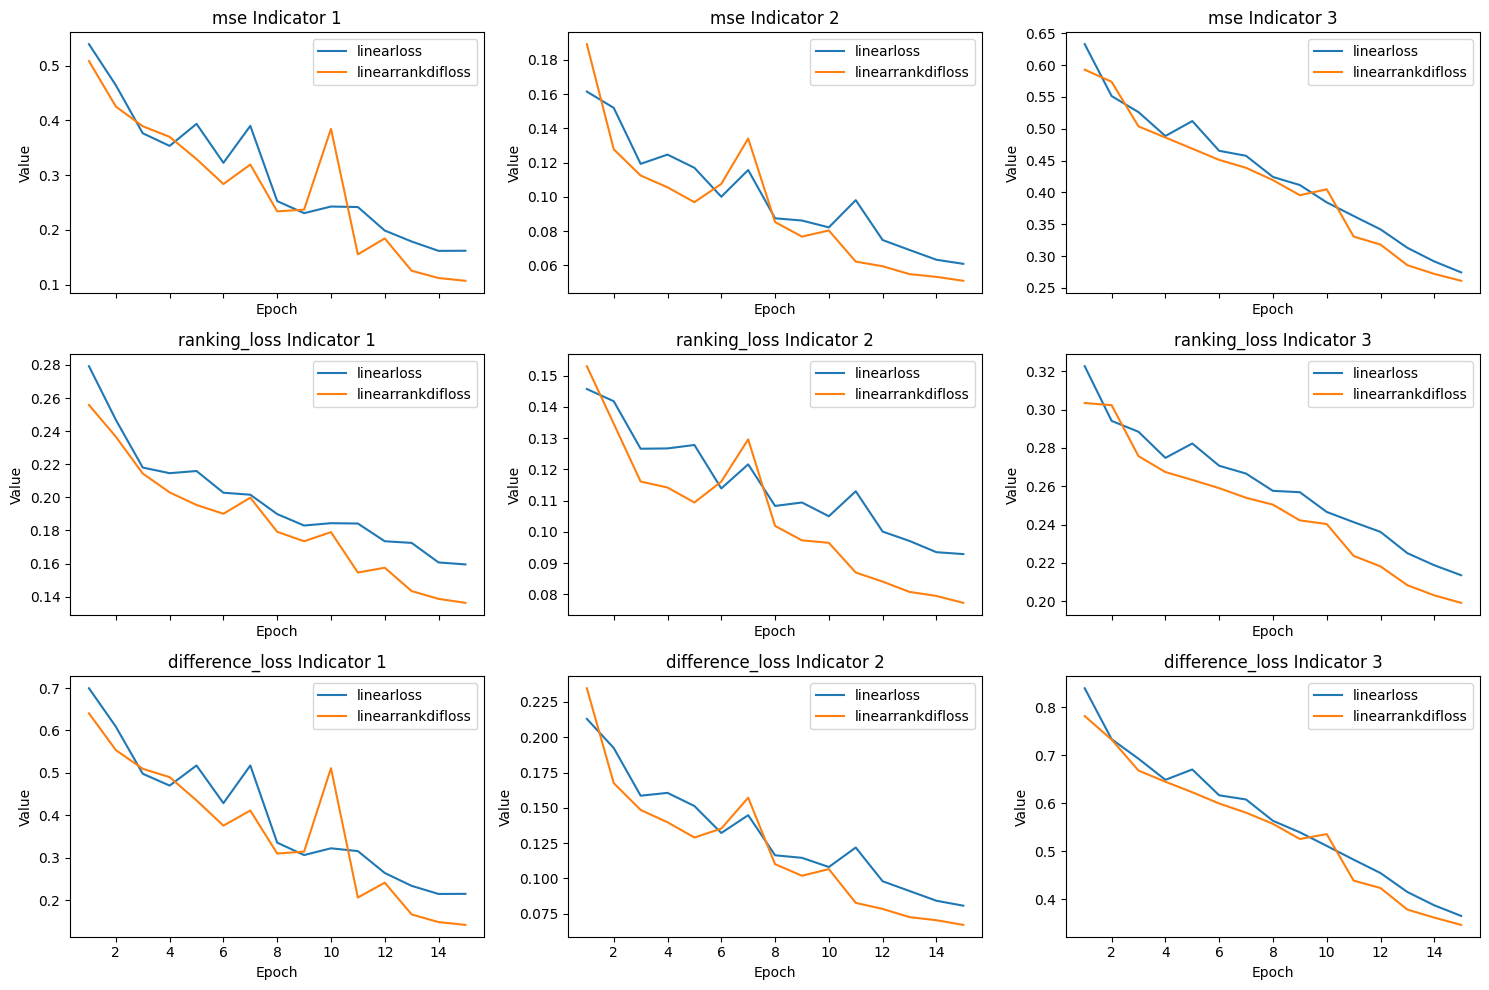

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 数据已经以每个epoch结束时的形式给出，我们将其转换为数组，方便作图
data = {
    'linearloss': {
        'mse': [
            [0.5394, 0.1615, 0.6329],
            [0.4643, 0.1520, 0.5514],
            [0.3766, 0.1193, 0.5261],
            [0.3535, 0.1247, 0.4886],
            [0.3938, 0.1170, 0.5121],
            [0.3226, 0.1001, 0.4654],
            [0.3901, 0.1157, 0.4575],
            [0.2526, 0.0875, 0.4243],
            [0.2306, 0.0862, 0.4116],
            [0.2427, 0.0822, 0.3844],
            [0.2418, 0.0981, 0.3630],
            [0.1988, 0.0748, 0.3420],
            [0.1788, 0.0690, 0.3130],
            [0.1617, 0.0633, 0.2916],
            [0.1619, 0.0609, 0.2744]
        ],
        'ranking_loss': [
            [0.2792, 0.1457, 0.3226],
            [0.2468, 0.1418, 0.2941],
            [0.2180, 0.1266, 0.2884],
            [0.2146, 0.1267, 0.2748],
            [0.2159, 0.1278, 0.2823],
            [0.2028, 0.1139, 0.2707],
            [0.2016, 0.1216, 0.2666],
            [0.1899, 0.1083, 0.2576],
            [0.1830, 0.1094, 0.2569],
            [0.1844, 0.1050, 0.2466],
            [0.1842, 0.1130, 0.2413],
            [0.1735, 0.1001, 0.2362],
            [0.1725, 0.0971, 0.2251],
            [0.1607, 0.0935, 0.2188],
            [0.1595, 0.0929, 0.2136]
        ],
        'difference_loss': [
            [0.6994, 0.2130, 0.8398],
            [0.6088, 0.1924, 0.7335],
            [0.4980, 0.1586, 0.6928],
            [0.4701, 0.1606, 0.6488],
            [0.5175, 0.1513, 0.6704],
            [0.4287, 0.1322, 0.6165],
            [0.5175, 0.1448, 0.6078],
            [0.3357, 0.1164, 0.5633],
            [0.3065, 0.1146, 0.5393],
            [0.3224, 0.1081, 0.5110],
            [0.3158, 0.1219, 0.4823],
            [0.2643, 0.0980, 0.4543],
            [0.2339, 0.0911, 0.4148],
            [0.2149, 0.0842, 0.3870],
            [0.2151, 0.0807, 0.3649]
        ]
    },
    'linearrankdifloss': {
        'mse': [
            [0.5085, 0.1892, 0.5928],
            [0.4254, 0.1278, 0.5738],
            [0.3894, 0.1125, 0.5037],
            [0.3700, 0.1056, 0.4863],
            [0.3294, 0.0969, 0.4687],
            [0.2838, 0.1076, 0.4511],
            [0.3194, 0.1341, 0.4387],
            [0.2339, 0.0853, 0.4193],
            [0.2370, 0.0768, 0.3957],
            [0.3846, 0.0804, 0.4049],
            [0.1553, 0.0622, 0.3307],
            [0.1844, 0.0595, 0.3181],
            [0.1253, 0.0549, 0.2857],
            [0.1121, 0.0533, 0.2720],
            [0.1070, 0.0510, 0.2612]
        ],
        'ranking_loss': [
            [0.2558, 0.1530, 0.3034],
            [0.2366, 0.1346, 0.3023],
            [0.2144, 0.1161, 0.2757],
            [0.2030, 0.1142, 0.2674],
            [0.1954, 0.1094, 0.2633],
            [0.1901, 0.1161, 0.2590],
            [0.1998, 0.1296, 0.2540],
            [0.1792, 0.1019, 0.2504],
            [0.1735, 0.0973, 0.2422],
            [0.1790, 0.0965, 0.2403],
            [0.1546, 0.0870, 0.2237],
            [0.1575, 0.0841, 0.2182],
            [0.1434, 0.0808, 0.2084],
            [0.1387, 0.0795, 0.2031],
            [0.1363, 0.0773, 0.1992]
        ],
        'difference_loss': [
            [0.6403, 0.2347, 0.7818],
            [0.5537, 0.1675, 0.7327],
            [0.5097, 0.1485, 0.6681],
            [0.4900, 0.1398, 0.6448],
            [0.4353, 0.1290, 0.6229],
            [0.3758, 0.1353, 0.5994],
            [0.4114, 0.1572, 0.5803],
            [0.3100, 0.1101, 0.5570],
            [0.3146, 0.1019, 0.5254],
            [0.5111, 0.1066, 0.5355],
            [0.2064, 0.0827, 0.4386],
            [0.2415, 0.0784, 0.4231],
            [0.1666, 0.0726, 0.3781],
            [0.1486, 0.0704, 0.3614],
            [0.1420, 0.0671, 0.3462]
        ]
    }
}

epochs = range(1, 16)
indicators = range(3)
loss_types = ['mse', 'ranking_loss', 'difference_loss']

# 为每种损失类型和每个指标绘制一个图
fig, axes = plt.subplots(nrows=len(loss_types), ncols=len(indicators), figsize=(15, 10), sharex=True)
for i, loss_type in enumerate(loss_types):
    for j in range(len(indicators)):
        ax = axes[i, j]
        for model_name, model_data in data.items():
            ax.plot(epochs, [model_data[loss_type][epoch][j] for epoch in range(15)], label=model_name)
        ax.set_title(f'{loss_type} Indicator {j+1}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Value')
        ax.legend()

plt.tight_layout()
plt.show()


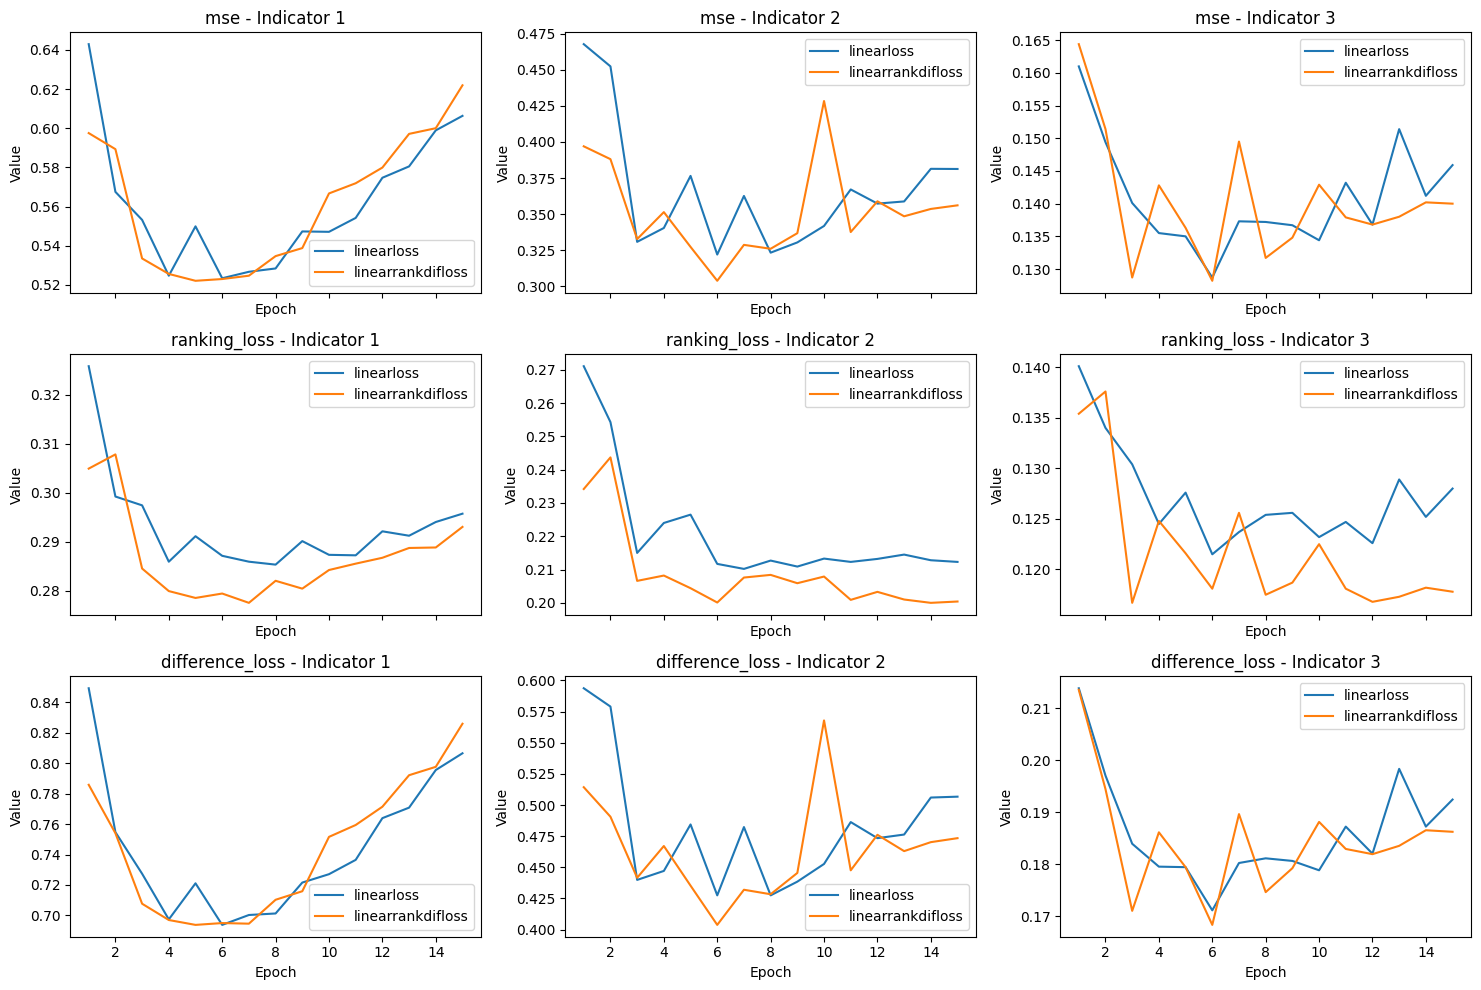

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting, including all epochs and indicators
data = {
    'linearloss': {
        'mse': [
            [0.4678, 0.1610, 0.6429],
            [0.4524, 0.1494, 0.5675],
            [0.3308, 0.1401, 0.5532],
            [0.3404, 0.1355, 0.5247],
            [0.3765, 0.1350, 0.5499],
            [0.3220, 0.1287, 0.5234],
            [0.3626, 0.1373, 0.5267],
            [0.3233, 0.1372, 0.5284],
            [0.3304, 0.1367, 0.5473],
            [0.3418, 0.1344, 0.5471],
            [0.3671, 0.1432, 0.5542],
            [0.3573, 0.1368, 0.5747],
            [0.3588, 0.1514, 0.5805],
            [0.3814, 0.1412, 0.5989],
            [0.3813, 0.1459, 0.6063]
        ],
        'ranking_loss': [
            [0.2711, 0.1401, 0.3258],
            [0.2543, 0.1340, 0.2992],
            [0.2150, 0.1304, 0.2974],
            [0.2240, 0.1245, 0.2859],
            [0.2265, 0.1276, 0.2911],
            [0.2117, 0.1215, 0.2871],
            [0.2102, 0.1237, 0.2859],
            [0.2127, 0.1254, 0.2853],
            [0.2109, 0.1256, 0.2901],
            [0.2133, 0.1232, 0.2873],
            [0.2123, 0.1247, 0.2872],
            [0.2132, 0.1226, 0.2921],
            [0.2145, 0.1289, 0.2912],
            [0.2128, 0.1252, 0.2940],
            [0.2123, 0.1280, 0.2957]
        ],
        'difference_loss': [
            [0.5937, 0.2138, 0.8492],
            [0.5790, 0.1970, 0.7547],
            [0.4399, 0.1839, 0.7274],
            [0.4471, 0.1795, 0.6974],
            [0.4844, 0.1794, 0.7211],
            [0.4275, 0.1711, 0.6938],
            [0.4823, 0.1802, 0.7003],
            [0.4275, 0.1811, 0.7013],
            [0.4385, 0.1806, 0.7216],
            [0.4527, 0.1788, 0.7271],
            [0.4863, 0.1872, 0.7365],
            [0.4734, 0.1820, 0.7639],
            [0.4763, 0.1983, 0.7708],
            [0.5060, 0.1872, 0.7955],
            [0.5067, 0.1924, 0.8065]
        ]
    },
    'linearrankdifloss': {
        'mse': [
            [0.3970, 0.1644, 0.5975],
            [0.3881, 0.1514, 0.5893],
            [0.3327, 0.1287, 0.5335],
            [0.3514, 0.1428, 0.5256],
            [0.3273, 0.1363, 0.5221],
            [0.3038, 0.1282, 0.5230],
            [0.3287, 0.1495, 0.5247],
            [0.3260, 0.1317, 0.5347],
            [0.3368, 0.1348, 0.5388],
            [0.4284, 0.1429, 0.5667],
            [0.3376, 0.1379, 0.5719],
            [0.3589, 0.1368, 0.5799],
            [0.3485, 0.1380, 0.5971],
            [0.3536, 0.1402, 0.6000],
            [0.3561, 0.1400, 0.6219]
        ],
        'ranking_loss': [
            [0.2342, 0.1354, 0.3049],
            [0.2437, 0.1376, 0.3078],
            [0.2066, 0.1167, 0.2845],
            [0.2082, 0.1248, 0.2799],
            [0.2044, 0.1216, 0.2785],
            [0.2001, 0.1181, 0.2794],
            [0.2076, 0.1256, 0.2775],
            [0.2084, 0.1175, 0.2820],
            [0.2059, 0.1187, 0.2804],
            [0.2079, 0.1225, 0.2842],
            [0.2009, 0.1181, 0.2855],
            [0.2033, 0.1168, 0.2867],
            [0.2010, 0.1173, 0.2887],
            [0.2000, 0.1182, 0.2888],
            [0.2004, 0.1178, 0.2930]
        ],
        'difference_loss': [
            [0.5143, 0.2135, 0.7858],
            [0.4906, 0.1944, 0.7540],
            [0.4416, 0.1710, 0.7077],
            [0.4671, 0.1861, 0.6970],
            [0.4353, 0.1794, 0.6938],
            [0.4038, 0.1683, 0.6950],
            [0.4320, 0.1896, 0.6946],
            [0.4284, 0.1746, 0.7103],
            [0.4455, 0.1792, 0.7159],
            [0.5679, 0.1881, 0.7516],
            [0.4476, 0.1829, 0.7594],
            [0.4761, 0.1819, 0.7714],
            [0.4630, 0.1835, 0.7921],
            [0.4702, 0.1865, 0.7976],
            [0.4734, 0.1862, 0.8259]
        ]
    }
}

epochs = range(1, 16)
indicators = [1, 2, 3]  # Three indicators
loss_types = ['mse', 'ranking_loss', 'difference_loss']

# Plot setup
fig, axes = plt.subplots(nrows=len(loss_types), ncols=len(indicators), figsize=(15, 10), sharex=True)
for i, loss_type in enumerate(loss_types):
    for j, indicator in enumerate(indicators):
        ax = axes[i][j]
        for model_name, model_data in data.items():
            ax.plot(epochs, [epoch_data[j-1] for epoch_data in model_data[loss_type]], label=model_name)
        ax.set_title(f'{loss_type} - Indicator {indicator}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Value')
        ax.legend()

plt.tight_layout()
plt.show()


In [3]:
import nibabel as nib
import numpy as np
import os

def calculate_nrmse(predicted, ground_truth, mask):
    # 应用掩膜
    predicted_masked = predicted[mask == 1].flatten()
    ground_truth_masked = ground_truth[mask == 1].flatten()
    
    nrmse =  np.linalg.norm(predicted_masked-ground_truth_masked,2) / np.linalg.norm(ground_truth_masked,2)
    return nrmse

# 文件夹路径
subjects_dir = r"/data2/mayupeng/HCP_25_dataset_ori"
predict_dir = r"/data2/mayupeng/my_code/test_linear_modi_v4_512_30"

# 获取后20个文件夹名
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

nrmse_results = []
nrmse_all = np.zeros((20, 3, 1))

for i, folder in enumerate(subject_ids):
    # 加载掩膜
    mask_path = os.path.join(subjects_dir, folder, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata()

    # 加载预测值和真实值
    predicted_vic = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    predicted_viso = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    predicted_od = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    ground_truth_vic = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    ground_truth_viso= nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    ground_truth_od =nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    # 计算每个指标的NRMSE
    nrmse_vic = calculate_nrmse(predicted_vic, ground_truth_vic, mask)
    nrmse_viso = calculate_nrmse(predicted_viso, ground_truth_viso, mask)
    nrmse_od = calculate_nrmse(predicted_od, ground_truth_od, mask)

    nrmse_all[i, 0, 0] = nrmse_vic
    nrmse_all[i, 1, 0] = nrmse_viso
    nrmse_all[i, 2, 0] = nrmse_od

    nrmse_results.append((folder, nrmse_vic, nrmse_viso, nrmse_od))

# 输出结果
for subject, nrmse_vic, nrmse_viso, nrmse_od in nrmse_results:
    print(f"Subject {subject}: Vic NRMSE = {nrmse_vic}, Viso NRMSE = {nrmse_viso}, OD NRMSE = {nrmse_od}")

print("Average NRMSE across 20 subjects:")
print(f"Vic NRMSE = {nrmse_all[:, 0, 0].mean()}")
print(f"Viso NRMSE = {nrmse_all[:, 1, 0].mean()}")
print(f"OD NRMSE = {nrmse_all[:, 2, 0].mean()}")


Subject 101107: Vic NRMSE = 0.08957954555982334, Viso NRMSE = 0.12631988666884916, OD NRMSE = 0.1390783794391448
Subject 101309: Vic NRMSE = 0.09518334277609579, Viso NRMSE = 0.16857261917771726, OD NRMSE = 0.14898408892182408
Subject 101410: Vic NRMSE = 0.09145295902078326, Viso NRMSE = 0.11421420109030209, OD NRMSE = 0.13630298161056523
Subject 101915: Vic NRMSE = 0.0861054018936068, Viso NRMSE = 0.11280581417164912, OD NRMSE = 0.13643365102217
Subject 102008: Vic NRMSE = 0.16536106337090573, Viso NRMSE = 0.1187228094443366, OD NRMSE = 0.15747174292551566
Subject 102109: Vic NRMSE = 0.09842900059674402, Viso NRMSE = 0.13186265460996568, OD NRMSE = 0.14693481792032348
Subject 102311: Vic NRMSE = 0.09116894946807874, Viso NRMSE = 0.1103749477029131, OD NRMSE = 0.13906031155088303
Subject 102513: Vic NRMSE = 0.09667190005877899, Viso NRMSE = 0.10207193495126816, OD NRMSE = 0.1370061696678022
Subject 102614: Vic NRMSE = 0.09430232360789079, Viso NRMSE = 0.10714086907597067, OD NRMSE = 0.

In [2]:
import nibabel as nib
import numpy as np
import os

def calculate_psnr(predicted, ground_truth, mask):
    # 应用掩膜
    predicted_masked = predicted[mask == 1].flatten()
    ground_truth_masked = ground_truth[mask == 1].flatten()
    
    # 计算MSE
    mse = np.mean((predicted_masked - ground_truth_masked) ** 2)
    if mse == 0:
        return float('inf')
    
    # 假设MAX_I为1，因为NODDI指标一般归一化到[0,1]区间
    MAX_I = 1.0
    psnr = 20 * np.log10(MAX_I / np.sqrt(mse))
    return psnr

# 文件夹路径
subjects_dir = r"/data2/mayupeng/HCP_25_dataset_ori"
predict_dir = r"/data2/mayupeng/my_code/testlinear_modi_res_rankdifmoco_1_1_mixed"

# 获取后20个文件夹名
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

psnr_results = []
psnr_all = np.zeros((20, 3, 1))

for i, folder in enumerate(subject_ids):
    # 加载掩膜
    mask_path = os.path.join(subjects_dir, folder, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata()

    # 加载预测值和真实值
    predicted_vic = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    predicted_viso = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    predicted_od = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    ground_truth_vic = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    ground_truth_viso = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    ground_truth_od = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    # 计算每个指标的PSNR
    psnr_vic = calculate_psnr(predicted_vic, ground_truth_vic, mask)
    psnr_viso = calculate_psnr(predicted_viso, ground_truth_viso, mask)
    psnr_od = calculate_psnr(predicted_od, ground_truth_od, mask)

    psnr_all[i, 0, 0] = psnr_vic
    psnr_all[i, 1, 0] = psnr_viso
    psnr_all[i, 2, 0] = psnr_od

    psnr_results.append((folder, psnr_vic, psnr_viso, psnr_od))

# 输出结果
for subject, psnr_vic, psnr_viso, psnr_od in psnr_results:
    print(f"Subject {subject}: Vic PSNR = {psnr_vic}, Viso PSNR = {psnr_viso}, OD PSNR = {psnr_od}")

print("Average PSNR across 20 subjects:")
print(f"Vic PSNR = {psnr_all[:, 0, 0].mean()}")
print(f"Viso PSNR = {psnr_all[:, 1, 0].mean()}")
print(f"OD PSNR = {psnr_all[:, 2, 0].mean()}")


Subject 101107: Vic PSNR = 25.22601386993642, Viso PSNR = 28.92292979742544, OD PSNR = 22.824316261846146
Subject 101309: Vic PSNR = 24.48694938042483, Viso PSNR = 27.579348403329156, OD PSNR = 22.235373794787332
Subject 101410: Vic PSNR = 25.10546457344131, Viso PSNR = 28.98200369030611, OD PSNR = 22.924183512071604
Subject 101915: Vic PSNR = 25.538934000768823, Viso PSNR = 29.614609646751195, OD PSNR = 22.96654265565456
Subject 102008: Vic PSNR = 19.86333336079504, Viso PSNR = 28.386779345806445, OD PSNR = 21.615092005829833
Subject 102109: Vic PSNR = 24.394242895137914, Viso PSNR = 28.112694559808578, OD PSNR = 22.244981900394762
Subject 102311: Vic PSNR = 24.779080491659155, Viso PSNR = 29.08273834233409, OD PSNR = 22.63668969857371
Subject 102513: Vic PSNR = 24.833205212705135, Viso PSNR = 29.34972104356952, OD PSNR = 22.874872049576446
Subject 102614: Vic PSNR = 24.638440933727583, Viso PSNR = 29.02331203355829, OD PSNR = 22.810191068047637
Subject 102715: Vic PSNR = 23.840335491

In [2]:
import nibabel as nib
import numpy as np
import os
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(predicted, ground_truth, mask):
    predicted_index = predicted[mask == 1]
    ground_truth_index = ground_truth[mask == 1]
    ssim_index = ssim(predicted_index, ground_truth_index, data_range=ground_truth_index.max() - ground_truth_index.min())
    return ssim_index

# 文件夹路径
subjects_dir = r"/data2/mayupeng/HCP_25_dataset_ori"
predict_dir = r"/data2/mayupeng/my_code/testlinear_modi_res_rankdifmoco_1_1_mixed"

# 获取后20个文件夹名
subject_ids = [
    "101107", "101309", "101410", "101915", "102008",
    "102109", "102311", "102513", "102614", "102715",
    "102816", "103010", "103111", "103212", "103414",
    "103515", "103818", "104012", "104416", "104820"
]

ssim_results = []
ssim_all = np.zeros((20, 3, 1))

for i, folder in enumerate(subject_ids):
    mask_path = os.path.join(subjects_dir, folder, "nodif_brain_mask.nii.gz")
    mask = nib.load(mask_path).get_fdata()

    # 加载预测值和真实值
    predicted_vic = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    predicted_viso = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    predicted_od = nib.load(os.path.join(predict_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    ground_truth_vic = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ICVF.nii.gz")).get_fdata()
    ground_truth_viso = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_ISOVF.nii.gz")).get_fdata()
    ground_truth_od = nib.load(os.path.join(subjects_dir, folder, "NODDI", "FIT_OD.nii.gz")).get_fdata()

    # 计算每个指标的SSIM
    ssim_vic = calculate_ssim(predicted_vic, ground_truth_vic, mask)
    ssim_viso = calculate_ssim(predicted_viso, ground_truth_viso, mask)
    ssim_od = calculate_ssim(predicted_od, ground_truth_od, mask)

    ssim_all[i, 0, 0] = ssim_vic
    ssim_all[i, 1, 0] = ssim_viso
    ssim_all[i, 2, 0] = ssim_od

    ssim_results.append((folder, ssim_vic, ssim_viso, ssim_od))

# 输出结果
for subject, ssim_vic, ssim_viso, ssim_od in ssim_results:
    print(f"Subject {subject}: Vic SSIM = {ssim_vic}, Viso SSIM = {ssim_viso}, OD SSIM = {ssim_od}")

print("Average SSIM across 20 subjects:")
print(f"Vic SSIM = {ssim_all[:, 0, 0].mean()}")
print(f"Viso SSIM = {ssim_all[:, 1, 0].mean()}")
print(f"OD SSIM = {ssim_all[:, 2, 0].mean()}")


Subject 101107: Vic SSIM = 0.8542066524056037, Viso SSIM = 0.8552744735385591, OD SSIM = 0.7890734218957931
Subject 101309: Vic SSIM = 0.8380479024709196, Viso SSIM = 0.836461324105965, OD SSIM = 0.7665965056634007
Subject 101410: Vic SSIM = 0.8634622087721003, Viso SSIM = 0.8837899362975794, OD SSIM = 0.8007893689106209
Subject 101915: Vic SSIM = 0.8729727254842675, Viso SSIM = 0.8811132153197081, OD SSIM = 0.7992223249016998
Subject 102008: Vic SSIM = 0.8158950094883941, Viso SSIM = 0.8559992225000708, OD SSIM = 0.7658318588734291
Subject 102109: Vic SSIM = 0.8505348236580559, Viso SSIM = 0.8500681828275376, OD SSIM = 0.7737467809441227
Subject 102311: Vic SSIM = 0.8688535319270623, Viso SSIM = 0.882711870820397, OD SSIM = 0.78941780451836
Subject 102513: Vic SSIM = 0.8652849556915909, Viso SSIM = 0.8842526045015652, OD SSIM = 0.8079016848821269
Subject 102614: Vic SSIM = 0.8614962598506213, Viso SSIM = 0.8870541862518929, OD SSIM = 0.7987189109718259
Subject 102715: Vic SSIM = 0.840